In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn; seaborn.set()
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn; seaborn.set()
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tseries.offsets import BDay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

1. What is the focus of the organization rule? There is no min_threshold. It is for 'confidecne'.

I didn't mention it in our video,  I set the min_threshold of Confidence to 0.4.
The purpose of the assocation rule is find out the factors that affect high, medium, low number of uses cases.

2. what is the meaning by 'high' in the association rule?(what is the number to say that it is high?)

Number of use cases divided into high, medium, and low at a rate of 33% , 66%.
In association rule case, The range of 'low' is greater than zero and less than four, the range of 'medium' is less than four seconds and the range of 'high' is greater than twelve.
3. What is your conclusion on the classification? This is the result of scheming the decision tree. For example, Yeongdeungpo has a temperature of 7.15~10.15 degrees on weekends, and when the wind speed is less than 1.45(m/s), it has a high (13 cases) 16 and low (1 cases or less).
4. In ARIMA, there is a big gap(Line22). what is the meaning of that big gap? We think the wide gap is a limitation. Because public bicycles were not activated before 2019, the utilization rate is significantly lower than after 2019. Therefore, our utilization rate is very low due to the fact that we extracted and used data only after 2019 and the nature of data in January 2020 is winter. For various reasons mentioned earlier, I tried my best to create an ARIMA model, but the results were disappointing. However, we expect to make better models in the future if we make models with more complete datasets.

5.Is there any intention on using XGBoost and GridSearch ? 
The reason I used 'xgboost' is I wanted to predict more specific 'number of use cases' 
instead of 'low', 'medium' and 'high'.
I tried a regression analysis at first, but the results were not very good. Therefore, we had to find another way to produce better results.

xgBoost has a number of parameter values that need to be adjusted.
It is not easy to find a suitable combination of parameters. 
To solve this problem, 'scikit learn' supports 'gridsearccv'.
'Gridsearchcv' provide the results of several parameter combinations.
Therefore, we use 'GridSearchCV' 

6. How can you determine the area(downtown, residential district)? /  No clustering result

1) Fisrt, in clustering for analysis of number of use cases by Weekdays/Weekends,
the result are
   cluster 0 : high cluster
   cluster 1 : low cluster
   cluster 2 : medium cluster
   
-> When extract only high number of cases from cluster0,
On weekends, Gangnam, Gangseo, Gwanak, Nowon, Seodaemun, Seocho, Seongdong, Songpa, Yeongdeungpo, and Jung-gu have a high rate of bicycle use.
These areas are near lakes or the Han River, and because they are downtown, they have a large floating population on weekends, which seems to have a high rate of weekend bike use.

-> When extract only low number of cases from cluster1,
On weekdays, the rate of bicycle use in Gangdong, Gangbuk, Gwanak, Gwangjin, Geumcheon, Dobong, Seongbuk, Yangcheon, Yongsan, Eunpyeong and Jungnang are low.
These areas have a low floating population on weekdays, because they have dense residential areas and few

2) Second, in clustering for analysis of number of use cases by weather data,

We've tried and visualized clustering at average temperature, average precipitation, average wind speed.
However, as a result, the distance between the three clusters was very close, and therefore the clusters were not well formed.
so weather data do not have a big impact on bicycle usage rate.

## Load Data

In [ ]:
data = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(10).csv')

In [ ]:
data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-11-16,10,415,415. DMC역 9번출구 앞,정기권,NaN,30대,1,17.96,0.17,720,3
1,2019-11-16,10,2110,2110. 조원동 미성아파트,정기권,NaN,30대,1,71.79,0.57,2450,31
2,2019-11-16,10,2139,2139. 서울신성초등학교,정기권,NaN,30대,1,83.66,0.75,3250,13
3,2019-11-16,10,2355,2355. 삼성역 5~6번 출구 사이,정기권,NaN,30대,1,0,0,0,25
4,2019-11-16,10,2349,2349. 역삼빌딩 앞(하나은행 옆),정기권,NaN,30대,1,11.58,0.1,450,4


## Reduce data by 1% on Date

In [ ]:
def sampling_func(data, sample_pct):

    np.random.seed(123)

    N = len(data)

    sample_n = int(len(data)*sample_pct) # integer

    sample = data.take(np.random.permutation(N)[:sample_n])

    return sample

In [ ]:
sample_set1 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

sample_set1

대여일자  대여시간  대여소번호                 대여소명 대여구분코드   성별  \
대여일자                                                                          
2019-11-16 3564    2019-11-16    12   1201    1201. 가락시장역 3번 출구    정기권    F   
           4080    2019-11-16    12    901         901. 응암1동사무소    정기권    M   
           2715    2019-11-16    12   2279      2279. 교대역 5번출구뒤    정기권  NaN   
           26812   2019-11-16    22    573        573. 구의문주차장 앞    정기권  NaN   
           1112    2019-11-16    11   1295       1295. 잠실역 8번출구    정기권  NaN   
...                       ...   ...    ...                  ...    ...  ...   
2019-11-30 510118  2019-11-30    17    201         201. 진미파라곤 앞    정기권  NaN   
           496382  2019-11-30    10   1854  1854. 가산아네스트 오피스텔 앞    정기권  NaN   
           517497  2019-11-30    21   2266       2266. 서초역 3번출구    일일권  NaN   
           500708  2019-11-30    12    276       276. SK 영등포주유소    일일권    F   
           490331  2019-11-30     2    568      568. 청계8가사거리 부근    정기권  NaN   

                  연령대코드  이용건수     운동량   탄소량  이동거리  사용시간  
대여일자                                                     
2019-11-16 3564     20대     1       0     0     0    16  
           4080     40대     1  145.53  0.87  3750    26  
           2715     20대     1   34.37  0.29  1240     8  
           26812    30대     2  203.66  1.21  5250    32  
           1112     20대     1   36.23  0.35  1500     9  
...                 ...   ...     ...   ...   ...   ...  
2019-11-30 510118   40대     1  103.95  0.81  3500    51  
           496382   30대     1   17.11  0.19   800     4  
           517497  ~10대     1    30.6  0.19   840     5  
           500708   30대     1   76.95  0.81  3470    22  
           490331   20대     1    49.4  0.44  1890    15  

[5197 rows x 12 columns]

In [ ]:
data2 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(2).csv')
sample_set2 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

In [ ]:
data3 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(3).csv')
sample_set3 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

In [ ]:
data4 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(4).csv')
sample_set4 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)


In [ ]:
data5 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(5).csv')
sample_set5 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

In [ ]:
data6 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(6).csv')
sample_set6 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)


In [ ]:
data7 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(7).csv')
sample_set7 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

In [ ]:
data8 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(8).csv')
sample_set8 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

In [ ]:
data9 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(9).csv')
sample_set9 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

In [ ]:
data10 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(10).csv')
sample_set10 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

In [ ]:
data11 = pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201812~201905(4).csv')
sample_set11 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

In [ ]:
data12 = pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201812~201905(5).csv')
sample_set12 = data.groupby(['대여일자']).apply(sampling_func, sample_pct= 0.01)

## Data Combination

In [ ]:
real = pd.concat([sample_set1,sample_set2,sample_set3,sample_set4,sample_set5,sample_set6,sample_set7,sample_set8,sample_set9,sample_set10,sample_set11,sample_set12])
real

대여일자  대여시간  대여소번호                 대여소명 대여구분코드   성별  \
대여일자                                                                          
2019-11-16 3564    2019-11-16    12   1201    1201. 가락시장역 3번 출구    정기권    F   
           4080    2019-11-16    12    901         901. 응암1동사무소    정기권    M   
           2715    2019-11-16    12   2279      2279. 교대역 5번출구뒤    정기권  NaN   
           26812   2019-11-16    22    573        573. 구의문주차장 앞    정기권  NaN   
           1112    2019-11-16    11   1295       1295. 잠실역 8번출구    정기권  NaN   
...                       ...   ...    ...                  ...    ...  ...   
2019-11-30 510118  2019-11-30    17    201         201. 진미파라곤 앞    정기권  NaN   
           496382  2019-11-30    10   1854  1854. 가산아네스트 오피스텔 앞    정기권  NaN   
           517497  2019-11-30    21   2266       2266. 서초역 3번출구    일일권  NaN   
           500708  2019-11-30    12    276       276. SK 영등포주유소    일일권    F   
           490331  2019-11-30     2    568      568. 청계8가사거리 부근    정기권  NaN   

                  연령대코드  이용건수     운동량   탄소량  이동거리  사용시간  
대여일자                                                     
2019-11-16 3564     20대     1       0     0     0    16  
           4080     40대     1  145.53  0.87  3750    26  
           2715     20대     1   34.37  0.29  1240     8  
           26812    30대     2  203.66  1.21  5250    32  
           1112     20대     1   36.23  0.35  1500     9  
...                 ...   ...     ...   ...   ...   ...  
2019-11-30 510118   40대     1  103.95  0.81  3500    51  
           496382   30대     1   17.11  0.19   800     4  
           517497  ~10대     1    30.6  0.19   840     5  
           500708   30대     1   76.95  0.81  3470    22  
           490331   20대     1    49.4  0.44  1890    15  

[62364 rows x 12 columns]

In [ ]:
real.to_csv('data/real.csv')

In [ ]:
d = pd.read_csv('data/2017data.csv')
d

,대여일자,Unnamed: 1,대여일자.1,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-01-01,429,2017-01-01,9,272,당산육갑문,정기,M,30대,1,327.00,2.55,11010,45
1,2017-01-01,326,2017-01-01,7,343,예일빌딩(율곡로) 앞,정기,M,30대,1,79.12,0.63,2700,15
2,2017-01-01,43,2017-01-01,0,237,보라매 두산위브 건너편,정기,M,30대,1,48.41,0.38,1630,8
3,2017-01-01,1592,2017-01-01,18,119,서강나루 공원,일일(회원),F,30대,1,136.62,1.60,6900,39
4,2017-01-01,1871,2017-01-01,21,568,청계8가사거리 부근,정기,F,20대,1,44.91,0.50,2140,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41774,2017-12-31,597486,2017-12-31,15,207,여의나루역 1번출구 앞,정기,M,40대,1,33.42,0.23,970,4
41775,2017-12-31,598767,2017-12-31,21,1145,곰달래 문화복지센터 1-2,정기,M,40대,1,113.77,1.03,4420,17
41776,2017-12-31,596593,2017-12-31,12,111,상수역 2번출구 앞,정기,M,20대,1,29.49,0.31,1330,4
41777,2017-12-31,597079,2017-12-31,14,1235,잠실트리지움310동 옆,정기,F,50대,1,186.28,1.82,7840,76


In [ ]:
d1 = pd.read_csv('data/2018data.csv')
d1

C:\Users\IME\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,대여일자,Unnamed: 1,대여일자.1,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
0,2018-01-01,2883,2018-01-01,16.0,1630.0,수연빌딩 앞,일일권,F,20대,1.0,33.76,0.34,1470.0,11.0,NaN
1,2018-01-01,1672,2018-01-01,12.0,409.0,누리꿈스퀘어 옆,정기권,M,40대,1.0,53.5,0.4,1710.0,12.0,NaN
2,2018-01-01,4185,2018-01-01,23.0,537.0,한양대후문역 부근,정기권,M,20대,1.0,87.67,0.86,3690.0,18.0,NaN
3,2018-01-01,3068,2018-01-01,17.0,505.0,자양사거리 광진아크로텔 앞,정기권,M,30대,1.0,69.8,0.55,2350.0,13.0,NaN
4,2018-01-01,4284,2018-01-01,23.0,1211.0,방이삼거리,일일권,M,20대,1.0,70.01,0.51,2210.0,19.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89630,2019-05-24,999295,2019-05-24,8.0,188.0,188. 홍은동 정원여중 입구,정기권,M,50대,1.0,144.05,1.13,4850.0,NaN,18.0
89631,2019-05-24,995833,2019-05-24,8.0,625.0,625. 답십리초등학교 앞(현대시장 옆),정기권,NaN,20대,3.0,58.34,0.61,2650.0,NaN,16.0
89632,2019-05-24,997001,2019-05-24,8.0,1158.0,1158. 가양역 8번출구,정기권,NaN,50대,1.0,49.36,0.38,1640.0,NaN,12.0
89633,2019-05-24,986366,2019-05-24,0.0,502.0,502. 뚝섬유원지역 1번출구 앞,일일권,NaN,20대,1.0,141.78,1.03,4420.0,NaN,38.0


In [ ]:
d2 = pd.read_csv('data/2019data.csv')
d2

,대여일자,Unnamed: 1,대여일자.1,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-06-01,40695,2019-06-01,18,2320,2320. 도곡역 대치지구대 방향,정기권,M,20대,1,62.96,0.49,2120,12
1,2019-06-01,10963,2019-06-01,8,301,301. 경복궁역 7번출구 앞,정기권,M,20대,2,41.2,0.34,1460,35
2,2019-06-01,38502,2019-06-01,17,502,502. 뚝섬유원지역 1번출구 앞,일일권,M,30대,1,167.27,1.22,5280,28
3,2019-06-01,49175,2019-06-01,20,1260,1260. 방이동 한양3차아파트 옆,일일권,NaN,20대,2,115.57,0.87,3760,30
4,2019-06-01,33030,2019-06-01,16,583,583. 청계천 생태교실 앞,정기권,M,40대,2,490.45,4.01,17280,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119887,2019-06-18,990519,2019-06-18,14,2032,2032. 이수역 11번출구쪽,정기권,M,20대,1,291.54,1.9,8180,36
119888,2019-06-18,991465,2019-06-18,15,2621,2621. 한성백제역 2번 출구,정기권,F,30대,1,19.58,0.24,1030,7
119889,2019-06-18,976802,2019-06-18,8,829,829. 베르가모앞,정기권,NaN,30대,2,68.83,0.5,2150,13
119890,2019-06-18,985562,2019-06-18,12,1208,1208. 풍납현대아파트쉼터,정기권,NaN,40대,1,139.42,1.13,4890,24


In [ ]:
d3 = pd.read_csv('data/2020-1data.csv')
d3

,대여일자,Unnamed: 1,대여일자.1,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,5842,2019-12-01,12,1243,1243. 문정 법조단지7,정기권,NaN,40대,1,27.1,0.27,1180,10
1,2019-12-01,5681,2019-12-01,11,1167,1167. 마곡수명산파크3단지 교차로,정기권,M,20대,1,36.04,0.32,1400,6
2,2019-12-01,7988,2019-12-01,22,411,411. DMC홍보관,정기권,F,20대,1,147.75,1.33,5740,28
3,2019-12-01,3157,2019-12-01,2,1240,1240. 문정 법조단지4,일일권,NaN,20대,1,88.03,0.79,3420,19
4,2019-12-01,6403,2019-12-01,16,1211,1211. 방이삼거리,정기권,M,50대,1,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10459,2020-01-14,1044564,2020-01-14,8,1405,1405. 망우역 1번출구,정기권,M,30대,1,43.5,0.39,1690,5
10460,2020-01-14,1047491,2020-01-14,11,2266,2266. 서초역 3번출구,정기권,F,30대,1,19.52,0.2,850,6
10461,2020-01-14,1042688,2020-01-14,7,2293,2293. SPC 앞,정기권,M,50대,1,80.82,0.73,3140,12
10462,2020-01-14,1039535,2020-01-14,1,1175,1175. 대한항공 인력개발센터,정기권,M,50대,1,18.02,0.16,700,4


In [ ]:
d4 = pd.read_csv('data/2020-2data.csv')
d4

,대여일자,Unnamed: 1,대여일자.1,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-06-01,8753,2020-06-01,8,1140,1140. 목동사거리 버스정류장,정기권,NaN,20대,1,201.38,1.71,7370.0,33
1,2020-06-01,20085,2020-06-01,12,275,275. 신동아아파트,정기권,NaN,20대,2,53.83,0.46,1970.0,20
2,2020-06-01,56233,2020-06-01,20,708,708. 서울출입국관리사무소 앞,정기권,NaN,~10대,2,0,0,0.0,55
3,2020-06-01,32906,2020-06-01,16,1175,1175. 대한항공 인력개발센터,정기권,NaN,20대,1,0,0,0.0,16
4,2020-06-01,23792,2020-06-01,13,2653,2653.올림픽공원사거리(선수촌아파트),정기권,NaN,40대,1,0,0,0.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10475,2020-06-15,1043541,2020-06-15,9,262,262. 영문초등학교 사거리,정기권,NaN,20대,1,0,0,0.0,14
10476,2020-06-15,1034326,2020-06-15,7,1088,1088.풍납사거리(강동),정기권,NaN,~10대,1,0,0,0.0,8
10477,2020-06-15,1028721,2020-06-15,1,1653,1653. 노원역1번출구,정기권,M,60대,1,0,0,0.0,17
10478,2020-06-15,1039864,2020-06-15,8,2903,2903.월계초안아파트 1단지,정기권,NaN,40대,1,0,0,0.0,18


In [ ]:
data = pd.concat([d,d1,d2,d3,d4])
data

,대여일자,Unnamed: 1,대여일자.1,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),대여소명,이동거리,이동시간,사용시간
0,2017-01-01,429,2017-01-01,9.0,272,당산육갑문,정기,M,30대,1.0,327,2.55,11010.0,45.0,NaN,NaN,NaN,NaN
1,2017-01-01,326,2017-01-01,7.0,343,예일빌딩(율곡로) 앞,정기,M,30대,1.0,79.12,0.63,2700.0,15.0,NaN,NaN,NaN,NaN
2,2017-01-01,43,2017-01-01,0.0,237,보라매 두산위브 건너편,정기,M,30대,1.0,48.41,0.38,1630.0,8.0,NaN,NaN,NaN,NaN
3,2017-01-01,1592,2017-01-01,18.0,119,서강나루 공원,일일(회원),F,30대,1.0,136.62,1.6,6900.0,39.0,NaN,NaN,NaN,NaN
4,2017-01-01,1871,2017-01-01,21.0,568,청계8가사거리 부근,정기,F,20대,1.0,44.91,0.5,2140.0,12.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10475,2020-06-15,1043541,2020-06-15,9.0,262,NaN,정기권,NaN,20대,1.0,0,0,NaN,NaN,262. 영문초등학교 사거리,0.0,NaN,14.0
10476,2020-06-15,1034326,2020-06-15,7.0,1088,NaN,정기권,NaN,~10대,1.0,0,0,NaN,NaN,1088.풍납사거리(강동),0.0,NaN,8.0
10477,2020-06-15,1028721,2020-06-15,1.0,1653,NaN,정기권,M,60대,1.0,0,0,NaN,NaN,1653. 노원역1번출구,0.0,NaN,17.0
10478,2020-06-15,1039864,2020-06-15,8.0,2903,NaN,정기권,NaN,40대,1.0,0,0,NaN,NaN,2903.월계초안아파트 1단지,0.0,NaN,18.0


In [ ]:
data.to_csv('data/data_total.csv')

### Equally apply to all year data to combine data into one

# Load aggregated Data (from 2017 to June 2020)

In [ ]:
total = pd.read_csv('data/data_total.csv')
total.head()

C:\Users\IME\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6,11,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,대여일자,Unnamed: 1,대여일자.1,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),대여소명,이동거리,이동시간,사용시간
0,0,2017-01-01,429,2017-01-01,9.0,272,당산육갑문,정기,M,30대,1.0,327,2.55,11010.0,45.0,NaN,NaN,NaN,NaN
1,1,2017-01-01,326,2017-01-01,7.0,343,예일빌딩(율곡로) 앞,정기,M,30대,1.0,79.12,0.63,2700.0,15.0,NaN,NaN,NaN,NaN
2,2,2017-01-01,43,2017-01-01,0.0,237,보라매 두산위브 건너편,정기,M,30대,1.0,48.41,0.38,1630.0,8.0,NaN,NaN,NaN,NaN
3,3,2017-01-01,1592,2017-01-01,18.0,119,서강나루 공원,일일(회원),F,30대,1.0,136.62,1.6,6900.0,39.0,NaN,NaN,NaN,NaN
4,4,2017-01-01,1871,2017-01-01,21.0,568,청계8가사거리 부근,정기,F,20대,1.0,44.91,0.5,2140.0,12.0,NaN,NaN,NaN,NaN


## Deletes unnecessary columns
- 'Unnamed: 0', 'Unnamed: 1', 'Unnamed: 0.1', and '대여일자.1'

In [ ]:
total.drop(['Unnamed: 0','Unnamed: 1','대여일자.1', '운동량' , '탄소량'] , axis = 1 , inplace = True)

## Apply fillna to combine columns
- '대여소' and '대여소명' have the same meaning. So put together.

In [ ]:
a = total[['대여소', '대여소명']]
a

,대여소,대여소명
0,당산육갑문,NaN
1,예일빌딩(율곡로) 앞,NaN
2,보라매 두산위브 건너편,NaN
3,서강나루 공원,NaN
4,청계8가사거리 부근,NaN
...,...,...
272245,NaN,262. 영문초등학교 사거리
272246,NaN,1088.풍납사거리(강동)
272247,NaN,1653. 노원역1번출구
272248,NaN,2903.월계초안아파트 1단지


### Move the data in the '대여소명' to the '대여소' by performing a bfill based on '대여소'

In [ ]:
a.fillna(method = 'bfill', axis = 1 , inplace = True)
a

C:\Users\IME\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,대여소,대여소명
0,당산육갑문,NaN
1,예일빌딩(율곡로) 앞,NaN
2,보라매 두산위브 건너편,NaN
3,서강나루 공원,NaN
4,청계8가사거리 부근,NaN
...,...,...
272245,262. 영문초등학교 사거리,262. 영문초등학교 사거리
272246,1088.풍납사거리(강동),1088.풍납사거리(강동)
272247,1653. 노원역1번출구,1653. 노원역1번출구
272248,2903.월계초안아파트 1단지,2903.월계초안아파트 1단지


### Delete '대여소', '대여소명' columns

In [ ]:
total = total.drop(['대여소', '대여소명'], axis = 1)
total

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,이동거리(M),이동시간(분),이동거리,이동시간,사용시간
0,2017-01-01,9.0,272,정기,M,30대,1.0,11010.0,45.0,NaN,NaN,NaN
1,2017-01-01,7.0,343,정기,M,30대,1.0,2700.0,15.0,NaN,NaN,NaN
2,2017-01-01,0.0,237,정기,M,30대,1.0,1630.0,8.0,NaN,NaN,NaN
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,6900.0,39.0,NaN,NaN,NaN
4,2017-01-01,21.0,568,정기,F,20대,1.0,2140.0,12.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
272245,2020-06-15,9.0,262,정기권,NaN,20대,1.0,NaN,NaN,0.0,NaN,14.0
272246,2020-06-15,7.0,1088,정기권,NaN,~10대,1.0,NaN,NaN,0.0,NaN,8.0
272247,2020-06-15,1.0,1653,정기권,M,60대,1.0,NaN,NaN,0.0,NaN,17.0
272248,2020-06-15,8.0,2903,정기권,NaN,40대,1.0,NaN,NaN,0.0,NaN,18.0


### Insert the '대여소' column into the total data '대여소명'.

In [ ]:
total['대여소명'] = a['대여소']
total

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,이동거리(M),이동시간(분),이동거리,이동시간,사용시간,대여소명
0,2017-01-01,9.0,272,정기,M,30대,1.0,11010.0,45.0,NaN,NaN,NaN,당산육갑문
1,2017-01-01,7.0,343,정기,M,30대,1.0,2700.0,15.0,NaN,NaN,NaN,예일빌딩(율곡로) 앞
2,2017-01-01,0.0,237,정기,M,30대,1.0,1630.0,8.0,NaN,NaN,NaN,보라매 두산위브 건너편
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,6900.0,39.0,NaN,NaN,NaN,서강나루 공원
4,2017-01-01,21.0,568,정기,F,20대,1.0,2140.0,12.0,NaN,NaN,NaN,청계8가사거리 부근
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272245,2020-06-15,9.0,262,정기권,NaN,20대,1.0,NaN,NaN,0.0,NaN,14.0,262. 영문초등학교 사거리
272246,2020-06-15,7.0,1088,정기권,NaN,~10대,1.0,NaN,NaN,0.0,NaN,8.0,1088.풍납사거리(강동)
272247,2020-06-15,1.0,1653,정기권,M,60대,1.0,NaN,NaN,0.0,NaN,17.0,1653. 노원역1번출구
272248,2020-06-15,8.0,2903,정기권,NaN,40대,1.0,NaN,NaN,0.0,NaN,18.0,2903.월계초안아파트 1단지


## Apply to the '이동거리' as above.

In [ ]:
b = total[['이동거리(M)', '이동거리']]
b

,이동거리(M),이동거리
0,11010.0,NaN
1,2700.0,NaN
2,1630.0,NaN
3,6900.0,NaN
4,2140.0,NaN
...,...,...
272245,NaN,0.0
272246,NaN,0.0
272247,NaN,0.0
272248,NaN,0.0


In [ ]:
b.fillna(method = 'bfill', axis = 1 , inplace = True)
b

C:\Users\IME\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,이동거리(M),이동거리
0,11010.0,NaN
1,2700.0,NaN
2,1630.0,NaN
3,6900.0,NaN
4,2140.0,NaN
...,...,...
272245,0.0,0.0
272246,0.0,0.0
272247,0.0,0.0
272248,0.0,0.0


In [ ]:
total = total.drop(['이동거리(M)','이동거리'], axis = 1)
total

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,이동시간(분),이동시간,사용시간,대여소명
0,2017-01-01,9.0,272,정기,M,30대,1.0,45.0,NaN,NaN,당산육갑문
1,2017-01-01,7.0,343,정기,M,30대,1.0,15.0,NaN,NaN,예일빌딩(율곡로) 앞
2,2017-01-01,0.0,237,정기,M,30대,1.0,8.0,NaN,NaN,보라매 두산위브 건너편
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,39.0,NaN,NaN,서강나루 공원
4,2017-01-01,21.0,568,정기,F,20대,1.0,12.0,NaN,NaN,청계8가사거리 부근
...,...,...,...,...,...,...,...,...,...,...,...
272245,2020-06-15,9.0,262,정기권,NaN,20대,1.0,NaN,NaN,14.0,262. 영문초등학교 사거리
272246,2020-06-15,7.0,1088,정기권,NaN,~10대,1.0,NaN,NaN,8.0,1088.풍납사거리(강동)
272247,2020-06-15,1.0,1653,정기권,M,60대,1.0,NaN,NaN,17.0,1653. 노원역1번출구
272248,2020-06-15,8.0,2903,정기권,NaN,40대,1.0,NaN,NaN,18.0,2903.월계초안아파트 1단지


In [ ]:
total['이동거리(M)'] = b['이동거리(M)']
total

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,이동시간(분),이동시간,사용시간,대여소명,이동거리(M)
0,2017-01-01,9.0,272,정기,M,30대,1.0,45.0,NaN,NaN,당산육갑문,11010.0
1,2017-01-01,7.0,343,정기,M,30대,1.0,15.0,NaN,NaN,예일빌딩(율곡로) 앞,2700.0
2,2017-01-01,0.0,237,정기,M,30대,1.0,8.0,NaN,NaN,보라매 두산위브 건너편,1630.0
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,39.0,NaN,NaN,서강나루 공원,6900.0
4,2017-01-01,21.0,568,정기,F,20대,1.0,12.0,NaN,NaN,청계8가사거리 부근,2140.0
...,...,...,...,...,...,...,...,...,...,...,...,...
272245,2020-06-15,9.0,262,정기권,NaN,20대,1.0,NaN,NaN,14.0,262. 영문초등학교 사거리,0.0
272246,2020-06-15,7.0,1088,정기권,NaN,~10대,1.0,NaN,NaN,8.0,1088.풍납사거리(강동),0.0
272247,2020-06-15,1.0,1653,정기권,M,60대,1.0,NaN,NaN,17.0,1653. 노원역1번출구,0.0
272248,2020-06-15,8.0,2903,정기권,NaN,40대,1.0,NaN,NaN,18.0,2903.월계초안아파트 1단지,0.0


In [ ]:
c = total[['이동시간(분)', '이동시간', '사용시간']]
c

,이동시간(분),이동시간,사용시간
0,45.0,NaN,NaN
1,15.0,NaN,NaN
2,8.0,NaN,NaN
3,39.0,NaN,NaN
4,12.0,NaN,NaN
...,...,...,...
272245,NaN,NaN,14.0
272246,NaN,NaN,8.0
272247,NaN,NaN,17.0
272248,NaN,NaN,18.0


In [ ]:
c.fillna(method = 'bfill', axis = 1 , inplace = True )
c

C:\Users\IME\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,이동시간(분),이동시간,사용시간
0,45.0,NaN,NaN
1,15.0,NaN,NaN
2,8.0,NaN,NaN
3,39.0,NaN,NaN
4,12.0,NaN,NaN
...,...,...,...
272245,14.0,14.0,14.0
272246,8.0,8.0,8.0
272247,17.0,17.0,17.0
272248,18.0,18.0,18.0


In [ ]:
total = total.drop(['이동시간(분)', '이동시간', '사용시간'] , axis = 1)
total

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,대여소명,이동거리(M)
0,2017-01-01,9.0,272,정기,M,30대,1.0,당산육갑문,11010.0
1,2017-01-01,7.0,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0
2,2017-01-01,0.0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0
4,2017-01-01,21.0,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0
...,...,...,...,...,...,...,...,...,...
272245,2020-06-15,9.0,262,정기권,NaN,20대,1.0,262. 영문초등학교 사거리,0.0
272246,2020-06-15,7.0,1088,정기권,NaN,~10대,1.0,1088.풍납사거리(강동),0.0
272247,2020-06-15,1.0,1653,정기권,M,60대,1.0,1653. 노원역1번출구,0.0
272248,2020-06-15,8.0,2903,정기권,NaN,40대,1.0,2903.월계초안아파트 1단지,0.0


In [ ]:
total['이동시간(분)'] = c['이동시간(분)']
total

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,대여소명,이동거리(M),이동시간(분)
0,2017-01-01,9.0,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7.0,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0.0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21.0,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
272245,2020-06-15,9.0,262,정기권,NaN,20대,1.0,262. 영문초등학교 사거리,0.0,14.0
272246,2020-06-15,7.0,1088,정기권,NaN,~10대,1.0,1088.풍납사거리(강동),0.0,8.0
272247,2020-06-15,1.0,1653,정기권,M,60대,1.0,1653. 노원역1번출구,0.0,17.0
272248,2020-06-15,8.0,2903,정기권,NaN,40대,1.0,2903.월계초안아파트 1단지,0.0,18.0


### There was no data in March due to errors in the company providing public bicycle data. So we asked the company for data and brought additional data.

In [ ]:
updated = pd.read_csv('data/3data.csv')

In [ ]:
updated

,Unnamed: 0,대여일자,대여소번호,대여시간,대여소명,대여구분코드,성별,연령대코드,운동량,탄소량,이용건수,이동시간(분),이동거리(M)
0,0,2019-03-01,384,13,384. 종로학원본원,Regular Ticket,M,20대,NaN,NaN,1,14,2680
1,1,2019-03-01,1650,19,1650. 중계근린공원내,Regular Ticket,M,20대,NaN,NaN,1,25,3400
2,2,2019-03-01,108,15,108. 서교동 사거리,Regular Ticket,M,20대,NaN,NaN,1,20,3640
3,3,2019-03-01,1369,15,1369. 미아사거리,Regular Ticket,M,20대,NaN,NaN,1,41,1870
4,4,2019-03-01,240,16,240. 문래역 4번출구 앞,Regular Ticket,M,20대,NaN,NaN,1,6,870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,8734,2019-03-31,199,22,199. 서울 월드컵 경기장,Group Ticket,F,70대~,NaN,NaN,1,10,2030
8735,8735,2019-03-31,907,16,907. CJ 드림시티,Group Ticket,F,70대~,NaN,NaN,1,3,320
8736,8736,2019-03-31,614,12,614. 용두동 사거리,Group Ticket,F,70대~,NaN,NaN,1,3,660
8737,8737,2019-03-31,1340,15,1340. 광운초등학교 앞,Group Ticket,F,70대~,NaN,NaN,1,105,21250


In [ ]:
total = pd.concat([total, updated])
total

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,대여소명,이동거리(M),이동시간(분),Unnamed: 0,운동량,탄소량
0,2017-01-01,9.0,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0,NaN,NaN,NaN
1,2017-01-01,7.0,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0,NaN,NaN,NaN
2,2017-01-01,0.0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0,NaN,NaN,NaN
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0,NaN,NaN,NaN
4,2017-01-01,21.0,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,2019-03-31,22.0,199,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0,8734.0,NaN,NaN
8735,2019-03-31,16.0,907,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0,8735.0,NaN,NaN
8736,2019-03-31,12.0,614,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0,8736.0,NaN,NaN
8737,2019-03-31,15.0,1340,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0,8737.0,NaN,NaN


## From now on, continue to preprocess using this data.

In [ ]:
total.to_csv('final_data.csv')

In [ ]:
total

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,대여소명,이동거리(M),이동시간(분),Unnamed: 0,운동량,탄소량
0,2017-01-01,9.0,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0,NaN,NaN,NaN
1,2017-01-01,7.0,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0,NaN,NaN,NaN
2,2017-01-01,0.0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0,NaN,NaN,NaN
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0,NaN,NaN,NaN
4,2017-01-01,21.0,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,2019-03-31,22.0,199,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0,8734.0,NaN,NaN
8735,2019-03-31,16.0,907,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0,8735.0,NaN,NaN
8736,2019-03-31,12.0,614,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0,8736.0,NaN,NaN
8737,2019-03-31,15.0,1340,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0,8737.0,NaN,NaN


In [ ]:
total = pd.read_csv('data/final_data.csv')

C:\Users\IME\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
total.head()

,Unnamed: 0,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,대여소명,이동거리(M),이동시간(분),Unnamed: 0.1,운동량,탄소량
0,0,2017-01-01,9.0,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0,NaN,NaN,NaN
1,1,2017-01-01,7.0,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0,NaN,NaN,NaN
2,2,2017-01-01,0.0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0,NaN,NaN,NaN
3,3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0,NaN,NaN,NaN
4,4,2017-01-01,21.0,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0,NaN,NaN,NaN


In [ ]:
total.drop('Unnamed: 0', axis=1  , inplace=True)
total.drop('Unnamed: 0.1', axis=1  , inplace=True)

In [ ]:
total.head()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,대여소명,이동거리(M),이동시간(분),운동량,탄소량
0,2017-01-01,9.0,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0,NaN,NaN
1,2017-01-01,7.0,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0,NaN,NaN
2,2017-01-01,0.0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0,NaN,NaN
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0,NaN,NaN
4,2017-01-01,21.0,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0,NaN,NaN


In [ ]:
total.drop('운동량', axis=1  , inplace=True)
total.drop('탄소량', axis=1  , inplace=True)

##  Change column name of 'total' data to English.

In [ ]:

total.columns = ['Date' , 'Time' , 'Rental place', 'Rental code', 'Sex', 'Age group', 'Number of use cases', 'Rental Name', 'Use distance(M)' , 'Use time(Minute)' ]

In [ ]:
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9.0,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7.0,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0.0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18.0,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21.0,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
280984,2019-03-31,22.0,199,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0
280985,2019-03-31,16.0,907,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0
280986,2019-03-31,12.0,614,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0
280987,2019-03-31,15.0,1340,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0


## Change 'Time' data type from float to int

In [ ]:
total['Time'] = total['Time'].astype(int)

In [ ]:
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
280984,2019-03-31,22,199,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0
280985,2019-03-31,16,907,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0
280986,2019-03-31,12,614,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0
280987,2019-03-31,15,1340,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0


## Check the null value

In [ ]:
total.isnull().sum()

Date                       0
Time                       0
Rental place               0
Rental code                0
Sex                    83685
Age group               1321
Number of use cases        0
Rental Name                9
Use distance(M)            0
Use time(Minute)           0
dtype: int64

##  Delete the null value in the 'Rental Name' column.


In [ ]:
total.dropna(subset = ['Rental Name'] , inplace = True)
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
280984,2019-03-31,22,199,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0
280985,2019-03-31,16,907,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0
280986,2019-03-31,12,614,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0
280987,2019-03-31,15,1340,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0


In [ ]:
total.isnull().sum()

Date                       0
Time                       0
Rental place               0
Rental code                0
Sex                    83685
Age group               1321
Number of use cases        0
Rental Name                0
Use distance(M)            0
Use time(Minute)           0
dtype: int64

In [ ]:
total['Rental place'].value_counts()

207.0     712
113.0     692
502.0     599
2219.0    572
1210.0    556
         ... 
1340        1
1028        1
3005        1
1962        1
3.0         1
Name: Rental place, Length: 4041, dtype: int64

### The number 'Rental place' means the region. Replace data with 1400 with zero in the 'Rental place' column.
### This is because the 'Rental Name' of a row with a value of 0 is a place located in '중랑구' and the 'Rental Place' value of '중랑구' is in the range of 1400 to 1499.

In [ ]:
a = total['Rental place'].apply(pd.to_numeric, errors='coerce').fillna(0)
a = pd.DataFrame(a)

In [ ]:
a

,Rental place
0,272.0
1,343.0
2,237.0
3,119.0
4,568.0
...,...
280984,199.0
280985,907.0
280986,614.0
280987,1340.0


### Extract index with zero value in column "Rental place".

In [ ]:
a = a.loc[a['Rental place'] == 0 ]
a.index

Int64Index([4152, 4485, 5321, 7072, 8227, 12826, 21314, 41156], dtype='int64')

In [ ]:
total.loc[4152,'Rental place']=1400
total.loc[4485,'Rental place']=1400
total.loc[5321,'Rental place']=1400
total.loc[7072,'Rental place']=1400
total.loc[8227,'Rental place']=1400
total.loc[12826,'Rental place']=1400
total.loc[21314,'Rental place']=1400
total.loc[41156,'Rental place']=1400

In [ ]:
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9,272,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7,343,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0,237,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18,119,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21,568,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
280984,2019-03-31,22,199,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0
280985,2019-03-31,16,907,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0
280986,2019-03-31,12,614,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0
280987,2019-03-31,15,1340,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0


### The 'Rental place' number is changed to an int value to change to a district.

In [ ]:
total['Rental place'] = total['Rental place'].astype(float).astype(int)


In [ ]:
nums = total['Rental place']

영등포범위2 = (nums >= 0) & (nums < 20)
total.loc[영등포범위2, 'Rental place'] = '영등포'
송파범위2 = (nums >= 20) & (nums < 30)
total.loc[송파범위2, 'Rental place'] = '송파'
영등포범위3 = (nums >= 30) & (nums < 100)
total.loc[영등포범위3, 'Rental place'] = '영등포'
서대문범위 = (nums >= 100) & (nums < 200)
total.loc[서대문범위, 'Rental place'] = '서대문'
마포범위 = (nums >= 400) & (nums < 500)
total.loc[마포범위, 'Rental place'] = '마포'
영등포범위 = (nums >= 200) & (nums < 300)
total.loc[영등포범위, 'Rental place'] = '영등포'
중구범위 = (nums >= 300) & (nums < 400) 
total.loc[중구범위, 'Rental place'] = '중구'
성동_광진범위 = (nums >= 500) & (nums < 600) 
total.loc[성동_광진범위, 'Rental place'] = '성동'
성동_광진범위2 = (nums >= 3500) & (nums < 3600) 
total.loc[성동_광진범위2, 'Rental place'] = '광진'
동대문범위 = (nums >= 600) & (nums < 700)
total.loc[동대문범위, 'Rental place'] = '동대문'
양천범위 = (nums >= 700) & (nums < 800)
total.loc[양천범위, 'Rental place'] = '양천'
용산범위 = (nums >= 800) & (nums < 900)
total.loc[용산범위, 'Rental place'] = '용산'
은평범위 = (nums >= 900) & (nums < 1000)
total.loc[은평범위, 'Rental place'] = '은평'
강동범위 = (nums >= 1000) & (nums < 1100)
total.loc[강동범위, 'Rental place'] = '강동'
강서범위 = (nums >= 1100) & (nums < 1200) #범위하나더
total.loc[강서범위, 'Rental place'] = '강서'
강서범위2 = (nums >= 2700) & (nums < 2800) #범위하나더
total.loc[강서범위2, 'Rental place'] = '강서'
송파범위 = (nums >= 1200) & (nums < 1300)
total.loc[송파범위, 'Rental place'] = '송파'
성북범위 = (nums >= 1300) & (nums < 1400)
total.loc[성북범위, 'Rental place'] = '성북'
중랑범위 = (nums >= 1400) & (nums < 1500)
total.loc[중랑범위, 'Rental place'] = '중랑'
강북범위 = (nums >= 1500) & (nums < 1600)
total.loc[강북범위, 'Rental place'] = '강북'
노원범위 = (nums >= 1600) & (nums < 1700)
total.loc[노원범위, 'Rental place'] = '노원'
도봉범위 = (nums >= 1700) & (nums < 1800)
total.loc[도봉범위, 'Rental place'] = '도봉'
금천범위 = (nums >= 1800) & (nums < 1900)
total.loc[금천범위, 'Rental place'] = '금천'
구로범위 = (nums >= 1900) & (nums < 2000)
total.loc[구로범위, 'Rental place'] = '구로'
관악레범위 = (nums >= 2000) & (nums < 2100)
total.loc[관악레범위, 'Rental place'] = '관악(레)'
관악범위 = (nums >= 2100) & (nums < 2200)
total.loc[관악범위, 'Rental place'] = '관악'
서초범위 = (nums >= 2200) & (nums < 2300)
total.loc[서초범위, 'Rental place'] = '서초'
강남범위 = (nums >= 2300) & (nums < 2600)
total.loc[강남범위, 'Rental place'] = '강남'

송파범위1 = (nums >= 2600) & (nums < 2800)
total.loc[송파범위1, 'Rental place'] = '송파'
구로범위1 = (nums >= 2800) & (nums < 3500)
total.loc[구로범위1, 'Rental place'] = '구로'
노원범위1 = (nums >= 2900) & (nums < 3100)
total.loc[노원범위1, 'Rental place'] = '노원'
서대문범위1 = (nums >= 3100) & (nums < 3200) 
total.loc[서대문범위1, 'Rental place'] = '서대문'
영등포범위1 = (nums >= 3200) & (nums < 3300) 
total.loc[영등포범위1, 'Rental place'] = '영등포'
관악범위1 = (nums >= 3300) & (nums < 3400) 
total.loc[관악범위1, 'Rental place'] = '관악'
중구범위1 = (nums >= 3400) & (nums < 3500) 
total.loc[중구범위1, 'Rental place'] = '중구'
성동범위1 = (nums >= 3600) & (nums < 3700)
total.loc[성동범위1, 'Rental place'] = '성동'
관악범위2 = (nums >= 3800) & (nums < 3900) 
total.loc[관악범위2, 'Rental place'] = '관악'
구로범위2 = (nums >= 3900) & (nums < 4000) 
total.loc[구로범위2, 'Rental place'] = '구로'

삭제범위 = (nums >= 9000) 
total.loc[삭제범위, 'Rental place'] = '삭제'

### 'Outlier' changed to '삭제' 
- Remove this.

In [ ]:
total.loc[total['Rental place']=='삭제']

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
42989,2018-01-23,9,삭제,정기권,M,30대,1.0,중랑센터2,730.0,2.0
43550,2018-02-07,8,삭제,정기권,M,30대,2.0,중랑센터2,1440.0,6.0
43733,2018-02-11,10,삭제,정기권,M,30대,1.0,중랑센터2,730.0,2.0
44112,2018-02-19,9,삭제,정기권,M,30대,1.0,중랑센터2,740.0,3.0
44172,2018-02-20,23,삭제,정기권,M,40대,1.0,중랑센터2,2070.0,9.0
44326,2018-02-22,19,삭제,정기권,M,30대,1.0,중랑센터2,1730.0,10.0
44350,2018-02-22,7,삭제,정기권,M,20대,1.0,중랑센터2,720.0,2.0
45684,2018-03-10,13,삭제,정기권,M,30대,1.0,중랑센터2,1160.0,76.0
46400,2018-03-16,17,삭제,정기권,M,30대,1.0,중랑센터2,740.0,4.0
46452,2018-03-16,15,삭제,정기권,M,60대,1.0,중랑센터2,740.0,5.0


In [ ]:
total.drop(total.loc[total['Rental place']=='삭제'].index, inplace=True)

In [ ]:
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9,영등포,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7,중구,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0,영등포,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18,서대문,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21,성동,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
280984,2019-03-31,22,서대문,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0
280985,2019-03-31,16,은평,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0
280986,2019-03-31,12,동대문,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0
280987,2019-03-31,15,성북,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0


### Number of data by region

In [ ]:
total['Rental place'].value_counts()

서대문      27882
영등포      23976
성동       23545
중구       21547
송파       20091
강서       13951
노원       12657
강남       12079
서초       11505
동대문      10803
관악        9715
마포        9401
은평        9393
구로        9133
성북        8878
강동        8496
양천        7704
광진        7155
중랑        7051
관악(레)     6885
용산        6630
강북        4538
도봉        3998
금천        3939
Name: Rental place, dtype: int64

### Change Sex column to Uppercase

In [ ]:
total['Sex'] = total['Sex'].str.upper()
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9,영등포,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7,중구,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0,영등포,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18,서대문,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21,성동,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
280984,2019-03-31,22,서대문,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0
280985,2019-03-31,16,은평,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0
280986,2019-03-31,12,동대문,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0
280987,2019-03-31,15,성북,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0


### Gender Check

In [ ]:
total['Sex'].value_counts()


M      121826
F       73829
\N       1612
0.0         1
Name: Sex, dtype: int64

In [ ]:
total.drop(total.loc[total['Sex']== '0.0'].index, inplace=True)

In [ ]:
total['Sex'].value_counts()

M     121826
F      73829
\N      1612
Name: Sex, dtype: int64

### Converts the 'N' value to the 'NAN' value in the 'sex' column.

In [ ]:
total['Sex'] = total['Sex'].replace(r"N", np.NaN, regex=True)

### Change the nan value of the 'sex' column to zero.

In [ ]:
total['Sex'].fillna(0, inplace = True)

In [ ]:
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9,영등포,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7,중구,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0,영등포,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18,서대문,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21,성동,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
280984,2019-03-31,22,서대문,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0
280985,2019-03-31,16,은평,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0
280986,2019-03-31,12,동대문,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0
280987,2019-03-31,15,성북,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0


### To fill zero value with the ratio of men and women
- Put the value of sex as zero in 'df

In [ ]:
df = total.loc[total['Sex'] == 0]
df

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
14655,2017-07-08,1,서대문,일일(비회원),0,NaN,1.0,신한은행 서교동금융센터점 앞,2550.0,12.0
14666,2017-07-08,0,강동,일일(비회원),0,NaN,1.0,암사역 3번출구(국민은행앞),2730.0,22.0
14728,2017-07-09,0,중구,일일(비회원),0,NaN,1.0,경복궁역 7번출구 앞,9480.0,59.0
14807,2017-07-11,12,관악(레),일일(비회원),0,NaN,1.0,흑석역 4번출구,13250.0,93.0
14942,2017-07-12,18,중구,일일(비회원),0,NaN,2.0,경복궁역 7번출구 앞,6860.0,101.0
...,...,...,...,...,...,...,...,...,...,...
272244,2020-06-15,5,관악,정기권,0,20대,1.0,2174. 삼성디지털프라자관악점,0.0,136.0
272245,2020-06-15,9,영등포,정기권,0,20대,1.0,262. 영문초등학교 사거리,0.0,14.0
272246,2020-06-15,7,강동,정기권,0,~10대,1.0,1088.풍납사거리(강동),0.0,8.0
272248,2020-06-15,8,노원,정기권,0,40대,1.0,2903.월계초안아파트 1단지,0.0,18.0


In [ ]:
df.reset_index(inplace = True)


In [ ]:
df

,index,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,14655,2017-07-08,1,서대문,일일(비회원),0,NaN,1.0,신한은행 서교동금융센터점 앞,2550.0,12.0
1,14666,2017-07-08,0,강동,일일(비회원),0,NaN,1.0,암사역 3번출구(국민은행앞),2730.0,22.0
2,14728,2017-07-09,0,중구,일일(비회원),0,NaN,1.0,경복궁역 7번출구 앞,9480.0,59.0
3,14807,2017-07-11,12,관악(레),일일(비회원),0,NaN,1.0,흑석역 4번출구,13250.0,93.0
4,14942,2017-07-12,18,중구,일일(비회원),0,NaN,2.0,경복궁역 7번출구 앞,6860.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...
85291,272244,2020-06-15,5,관악,정기권,0,20대,1.0,2174. 삼성디지털프라자관악점,0.0,136.0
85292,272245,2020-06-15,9,영등포,정기권,0,20대,1.0,262. 영문초등학교 사거리,0.0,14.0
85293,272246,2020-06-15,7,강동,정기권,0,~10대,1.0,1088.풍납사거리(강동),0.0,8.0
85294,272248,2020-06-15,8,노원,정기권,0,40대,1.0,2903.월계초안아파트 1단지,0.0,18.0


### Switch to line 51978 to M to match the male ratio of the 'total' data.

In [ ]:
df.loc[ : 51978,  'Sex'] = 'M'

C:\Users\IME\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Change from 51978 to last row F to match the ratio of women in the 'total' data.

In [ ]:
df.loc[51979 : ,  'Sex'] = 'F'

In [ ]:
df.set_index('index' , inplace = True)

In [ ]:
df

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
index,,,,,,,,,,
14655,2017-07-08,1,서대문,일일(비회원),M,NaN,1.0,신한은행 서교동금융센터점 앞,2550.0,12.0
14666,2017-07-08,0,강동,일일(비회원),M,NaN,1.0,암사역 3번출구(국민은행앞),2730.0,22.0
14728,2017-07-09,0,중구,일일(비회원),M,NaN,1.0,경복궁역 7번출구 앞,9480.0,59.0
14807,2017-07-11,12,관악(레),일일(비회원),M,NaN,1.0,흑석역 4번출구,13250.0,93.0
14942,2017-07-12,18,중구,일일(비회원),M,NaN,2.0,경복궁역 7번출구 앞,6860.0,101.0
...,...,...,...,...,...,...,...,...,...,...
272244,2020-06-15,5,관악,정기권,F,20대,1.0,2174. 삼성디지털프라자관악점,0.0,136.0
272245,2020-06-15,9,영등포,정기권,F,20대,1.0,262. 영문초등학교 사거리,0.0,14.0
272246,2020-06-15,7,강동,정기권,F,~10대,1.0,1088.풍납사거리(강동),0.0,8.0


### Delete rows with zero values in the SEX column

In [ ]:
total.drop(total.loc[total['Sex']== 0 ].index, inplace=True)

In [ ]:
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9,영등포,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7,중구,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0,영등포,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18,서대문,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21,성동,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
280984,2019-03-31,22,서대문,Group Ticket,F,70대~,1.0,199. 서울 월드컵 경기장,2030.0,10.0
280985,2019-03-31,16,은평,Group Ticket,F,70대~,1.0,907. CJ 드림시티,320.0,3.0
280986,2019-03-31,12,동대문,Group Ticket,F,70대~,1.0,614. 용두동 사거리,660.0,3.0
280987,2019-03-31,15,성북,Group Ticket,F,70대~,1.0,1340. 광운초등학교 앞,21250.0,105.0


In [ ]:
total = pd.concat([total , df])
total

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute)
0,2017-01-01,9,영등포,정기,M,30대,1.0,당산육갑문,11010.0,45.0
1,2017-01-01,7,중구,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0
2,2017-01-01,0,영등포,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0
3,2017-01-01,18,서대문,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0
4,2017-01-01,21,성동,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0
...,...,...,...,...,...,...,...,...,...,...
272244,2020-06-15,5,관악,정기권,F,20대,1.0,2174. 삼성디지털프라자관악점,0.0,136.0
272245,2020-06-15,9,영등포,정기권,F,20대,1.0,262. 영문초등학교 사거리,0.0,14.0
272246,2020-06-15,7,강동,정기권,F,~10대,1.0,1088.풍납사거리(강동),0.0,8.0
272248,2020-06-15,8,노원,정기권,F,40대,1.0,2903.월계초안아파트 1단지,0.0,18.0


## Check  null value

In [ ]:
total.isnull().sum()

Date                      0
Time                      0
Rental place              0
Rental code               0
Sex                       0
Age group              1321
Number of use cases       0
Rental Name               0
Use distance(M)           0
Use time(Minute)          0
dtype: int64

In [ ]:
total['Age group'].value_counts()

20대     129314
30대      70025
40대      41678
50대      21303
~10대     10223
60대       5313
70대~      1769
0.0          5
Name: Age group, dtype: int64

## Delete 0.0 value in Age group

In [ ]:
total.drop(total.loc[total['Age group'] == '0.0'].index, inplace=True)

In [ ]:
total['Age group'].value_counts()

20대     129314
30대      70025
40대      41678
50대      21303
~10대     10223
60대       5313
70대~      1769
Name: Age group, dtype: int64

## Delete Blank in column 'Age group'

In [ ]:
total.replace('', np.nan, inplace=True)
total.dropna(inplace=True)

In [ ]:
total.isnull().sum()

Date                   0
Time                   0
Rental place           0
Rental code            0
Sex                    0
Age group              0
Number of use cases    0
Rental Name            0
Use distance(M)        0
Use time(Minute)       0
dtype: int64

## Load Weather Data

In [ ]:
w = pd.read_csv('data/weather.csv')

In [ ]:
w.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s)
0,116,관악(레),2017-01-01,1.0,-0.9,2.9,0.0,2.2
1,116,관악(레),2017-01-02,1.8,-1.8,4.2,0.0,3.0
2,116,관악(레),2017-01-03,-1.0,-3.9,2.4,0.0,3.5
3,116,관악(레),2017-01-04,1.2,-0.6,3.9,0.0,3.6
4,116,관악(레),2017-01-05,0.6,-1.3,3.8,0.0,3.7


## Check null value

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)      177
최저기온(°C)      165
최고기온(°C)      165
일강수량(mm)        9
평균 풍속(m/s)    166
dtype: int64

## Fill the null value of the 일강수량(mm)  column with zero

In [ ]:
w['일강수량(mm)'].fillna(0, inplace = True)

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)      177
최저기온(°C)      165
최고기온(°C)      165
일강수량(mm)        0
평균 풍속(m/s)    166
dtype: int64

## Because the average temperature is not much different from the average temperature of the previous day, fill the nan value by using 'ffill' method

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)      177
최저기온(°C)      165
최고기온(°C)      165
일강수량(mm)        0
평균 풍속(m/s)    166
dtype: int64

In [ ]:
w['평균기온(°C)'].fillna(method='ffill', inplace = True)

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)      165
최고기온(°C)      165
일강수량(mm)        0
평균 풍속(m/s)    166
dtype: int64

## Because the lowest temperature is not much different from the lowest temperature of the previous day, fill the nan value by using 'ffill' method

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)      165
최고기온(°C)      165
일강수량(mm)        0
평균 풍속(m/s)    166
dtype: int64

In [ ]:
w['최저기온(°C)'].fillna(method='ffill', inplace = True)

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)      165
일강수량(mm)        0
평균 풍속(m/s)    166
dtype: int64

## Because the highest temperature is not much different from the lowest temperature of the previous day, fill the nan value by using 'ffill' method

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)      165
일강수량(mm)        0
평균 풍속(m/s)    166
dtype: int64

In [ ]:
w['최고기온(°C)'].fillna(method='ffill', inplace = True)

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
일강수량(mm)        0
평균 풍속(m/s)    166
dtype: int64

##  fill the nan value in '평균 풍속(m/s)'  by using 'ffill' method

In [ ]:
w.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
일강수량(mm)        0
평균 풍속(m/s)    166
dtype: int64

In [ ]:
w['평균 풍속(m/s)'].fillna(method='ffill', inplace = True)

In [ ]:
w.isnull().sum()

지점            0
지점명           0
일시            0
평균기온(°C)      0
최저기온(°C)      0
최고기온(°C)      0
일강수량(mm)      0
평균 풍속(m/s)    0
dtype: int64

## Remove overly detailed '지점' columns because we were divided by district through 'Rental place'

In [ ]:
w.drop('지점', axis =1 , inplace = True)

##  Change the name of  columns to English

In [ ]:
w.columns = ['Rental place', 'Date' , 'Average_temp(°C)', 'Lowest_temp(°C)' ,  'Highest_temp(°C)', 'Average_rainfall(mm)', 'Average_wind_speed(m/s)' ]

In [ ]:
w

,Rental place,Date,Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,관악(레),2017-01-01,1.0,-0.9,2.9,0.0,2.2
1,관악(레),2017-01-02,1.8,-1.8,4.2,0.0,3.0
2,관악(레),2017-01-03,-1.0,-3.9,2.4,0.0,3.5
3,관악(레),2017-01-04,1.2,-0.6,3.9,0.0,3.6
4,관악(레),2017-01-05,0.6,-1.3,3.8,0.0,3.7
...,...,...,...,...,...,...,...
30250,영등포,2020-06-11,26.6,22.6,32.8,0.0,0.8
30251,영등포,2020-06-12,25.4,22.4,28.5,0.0,0.4
30252,영등포,2020-06-13,27.8,21.9,34.0,0.0,0.5
30253,영등포,2020-06-14,24.2,20.3,30.2,1.0,1.3


### Change the 'date' format of 'weather' data and '따릉이' data to datetime.

In [ ]:
w['Date'] = pd.to_datetime(w['Date'])
total['Date'] = pd.to_datetime(total['Date'])

In [ ]:
w.loc[w['Rental place'] == '영등포 ', 'Rental place'] = '영등포'


In [ ]:
w.loc[w['Rental place'] == '영등포']

,Rental place,Date,Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
28993,영등포,2017-01-01,4.9,0.8,8.7,0.0,0.4
28994,영등포,2017-01-02,6.4,3.2,10.1,0.0,1.0
28995,영등포,2017-01-03,4.0,0.9,7.9,0.0,0.9
28996,영등포,2017-01-04,5.9,3.9,9.9,0.0,0.8
28997,영등포,2017-01-05,5.6,2.1,8.4,0.0,0.8
...,...,...,...,...,...,...,...
30250,영등포,2020-06-11,26.6,22.6,32.8,0.0,0.8
30251,영등포,2020-06-12,25.4,22.4,28.5,0.0,0.4
30252,영등포,2020-06-13,27.8,21.9,34.0,0.0,0.5
30253,영등포,2020-06-14,24.2,20.3,30.2,1.0,1.3


### Remove the space after '영등포', which is one of the values of 'Rental place values.

In [ ]:
w['Rental place'] = w['Rental place'].str.strip()

### Based on 'Date' and 'Rental Place', '따릉이' and 'weather' data are combined.

In [ ]:
pp = pd.merge(total, w, how = 'left', on= ['Date', 'Rental place'])
pp

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute),Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,2017-01-01,9,영등포,정기,M,30대,1.0,당산육갑문,11010.0,45.0,4.9,0.8,8.7,0.0,0.4
1,2017-01-01,7,중구,정기,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0,3.4,-0.4,6.7,0.0,1.1
2,2017-01-01,0,영등포,정기,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0,4.9,0.8,8.7,0.0,0.4
3,2017-01-01,18,서대문,일일(회원),F,30대,1.0,서강나루 공원,6900.0,39.0,3.9,0.3,7.5,0.0,1.6
4,2017-01-01,21,성동,정기,F,20대,1.0,청계8가사거리 부근,2140.0,12.0,4.6,0.5,7.9,0.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279620,2020-06-15,5,관악,정기권,F,20대,1.0,2174. 삼성디지털프라자관악점,0.0,136.0,20.9,16.6,26.3,0.0,2.8
279621,2020-06-15,9,영등포,정기권,F,20대,1.0,262. 영문초등학교 사거리,0.0,14.0,23.3,19.0,29.0,0.0,1.7
279622,2020-06-15,7,강동,정기권,F,~10대,1.0,1088.풍납사거리(강동),0.0,8.0,23.7,19.0,29.9,0.0,2.2
279623,2020-06-15,8,노원,정기권,F,40대,1.0,2903.월계초안아파트 1단지,0.0,18.0,23.3,15.3,30.5,0.0,1.6


In [ ]:
pp.isnull().sum()

Date                        0
Time                        0
Rental place                0
Rental code                 0
Sex                         0
Age group                   0
Number of use cases         0
Rental Name                 0
Use distance(M)             0
Use time(Minute)            0
Average_temp(°C)           51
Lowest_temp(°C)            51
Highest_temp(°C)           51
Average_rainfall(mm)       51
Average_wind_speed(m/s)    51
dtype: int64

## Find the row with null value.

In [ ]:
null_data = pp[pp.isnull().any(axis=1)]
null_data.reset_index()

,index,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute),Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,19933,2017-08-22,14,강동,정기,F,20대,1.0,강동세무서,2680.0,22.0,NaN,NaN,NaN,NaN,NaN
1,19962,2017-08-22,7,강동,정기,M,30대,1.0,암사역 3번출구(국민은행앞),2390.0,15.0,NaN,NaN,NaN,NaN,NaN
2,20002,2017-08-22,8,강동,정기,F,30대,1.0,LIGA 아파트 앞,1770.0,16.0,NaN,NaN,NaN,NaN,NaN
3,20045,2017-08-22,17,강동,정기,M,30대,1.0,삼성광나루아파트 버스정류장,2220.0,24.0,NaN,NaN,NaN,NaN,NaN
4,20100,2017-08-22,11,강동,정기,F,20대,1.0,롯데캐슬 115동앞,900.0,4.0,NaN,NaN,NaN,NaN,NaN
5,20294,2017-08-24,21,강동,정기,M,20대,1.0,강동경찰서,2100.0,39.0,NaN,NaN,NaN,NaN,NaN
6,38143,2017-11-26,13,은평,일일(회원),F,20대,2.0,새절역 2번출구,6390.0,51.0,NaN,NaN,NaN,NaN,NaN
7,38164,2017-11-26,17,은평,일일(회원),F,20대,1.0,예일여중,6010.0,31.0,NaN,NaN,NaN,NaN,NaN
8,38188,2017-11-26,19,은평,일일(회원),M,30대,1.0,역촌파출소,13300.0,58.0,NaN,NaN,NaN,NaN,NaN
9,38224,2017-11-27,5,은평,정기,F,20대,1.0,응암오거리,2140.0,9.0,NaN,NaN,NaN,NaN,NaN


## Weather data are reasonable to follow the previous day's values rather than the average. Therefore, the temperature is filled by using 'ffill' method

In [ ]:
pp = pp.fillna(method='ffill')

In [ ]:
pp.isnull().sum()

Date                       0
Time                       0
Rental place               0
Rental code                0
Sex                        0
Age group                  0
Number of use cases        0
Rental Name                0
Use distance(M)            0
Use time(Minute)           0
Average_temp(°C)           0
Lowest_temp(°C)            0
Highest_temp(°C)           0
Average_rainfall(mm)       0
Average_wind_speed(m/s)    0
dtype: int64

## Rental code preprocessing

- Regular Ticket : 정기권,정기, 정기(2시간권)  
- Daily Ticket : 일일권, 일일(회원), 일일(비회원) , 일일(2시간권), 일일권(비회원) 
- Group Ticket : 단체권, 단체

In [ ]:
pp['Rental code'].value_counts()

정기권               185441
일일권                43339
정기                 30081
일일(회원)              8012
Regular Ticket      5599
Group Ticket        1734
단체권                 1642
Daily Ticket        1397
정기(2시간권)             958
일일(2시간권)             629
일일(비회원)              566
단체                   210
일일권(비회원)              15
0.0                    2
Name: Rental code, dtype: int64

In [ ]:
pp.loc[pp['Rental code'] == '정기권', 'Rental code'] = 'Regular Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '정기', 'Rental code'] = 'Regular Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '정기(2시간권)', 'Rental code'] = 'Regular Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '일일권', 'Rental code'] = 'Daily Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '일일(회원)', 'Rental code'] = 'Daily Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '일일(비회원)', 'Rental code'] = 'Daily Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '일일(2시간권)', 'Rental code'] = 'Daily Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '일일권(비회원)', 'Rental code'] = 'Daily Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '단체권', 'Rental code'] = 'Group Ticket'

In [ ]:
pp.loc[pp['Rental code'] == '단체', 'Rental code'] = 'Group Ticket'

In [ ]:
pp['Rental code'].value_counts()

Regular Ticket    222079
Daily Ticket       53958
Group Ticket        3586
0.0                    2
Name: Rental code, dtype: int64

In [ ]:
pp.drop(pp.loc[pp['Rental code']== '0.0'].index, inplace=True)

In [ ]:
pp['Rental code'].value_counts()

Regular Ticket    222079
Daily Ticket       53958
Group Ticket        3586
Name: Rental code, dtype: int64

In [ ]:
pp = pd.read_csv('data/Realfinal_data.csv')

In [ ]:
pp.drop('Unnamed: 0',axis=1 , inplace=True)

# EDA

|Attribute Name|Description|Data Type|
|------|---|---|
|Date|Shows the year, month, and day when the user rented the bicycle.|datetime64[ns]|
|Time |It means the time of borrowing a bicycle. The unit is an hour.|int32|
|Rental place|It is the location of a rental shop. The unit is the district.|object|
|Rental code|It means whether the member is 'Regular Ticket' member or 'Daily Ticket' member or 'Group Ticket'.|object|
|Sex|It means the gender of the user.|object|
|Age group|Indicates the age range of the user. The unit is ten years.|object|
|Number of use cases|It means the number of bicycles rented.|float64|
|Rental Name|Indicates the specific location of the rental office.|object|
|Use distance(M)|It means the distance traveled through rented bicycle.|float64|
|Use time(Minute)|Indicates the time the user used the bicycle.|float64|
|Average_temp(°C)|Indicates the average temperature for the day.|float64|
|Lowest_temp(°C)|Indicates the lowest temperature for the day.|float64|
|Highest_temp(°C) |Indicates the highest temperature for the day.|float64|
|Average_rainfall(mm)|Indicates the average precipitation for the day.|float64|
|Average_wind_speed(m/s)|Indicates the average wind_speed for the day.|float64|

In [ ]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426424 entries, 0 to 426423
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Date                     426424 non-null  object 
 1   Time                     426424 non-null  int64  
 2   Rental place             426424 non-null  object 
 3   Rental code              426424 non-null  object 
 4   Sex                      426424 non-null  object 
 5   Age group                426424 non-null  object 
 6   Number of use cases      426424 non-null  float64
 7   Rental Name              426424 non-null  object 
 8   Use distance(M)          426424 non-null  float64
 9   Use time(Minute)         426424 non-null  float64
 10  Average_temp(°C)         426424 non-null  float64
 11  Lowest_temp(°C)          426424 non-null  float64
 12  Highest_temp(°C)         426424 non-null  float64
 13  Average_rainfall(mm)     426424 non-null  float64
 14  Aver

In [ ]:
pp.dtypes

Date                        object
Time                         int64
Rental place                object
Rental code                 object
Sex                         object
Age group                   object
Number of use cases        float64
Rental Name                 object
Use distance(M)            float64
Use time(Minute)           float64
Average_temp(°C)           float64
Lowest_temp(°C)            float64
Highest_temp(°C)           float64
Average_rainfall(mm)       float64
Average_wind_speed(m/s)    float64
dtype: object

In [ ]:
pp['Number of use cases'] = pp['Number of use cases'].astype('int')

In [ ]:
pp.head()

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute),Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,2017-01-01,9,영등포,Regular Ticket,M,30대,1,당산육갑문,11010.0,45.0,4.9,0.8,8.7,0.0,0.4
1,2017-01-01,7,중구,Regular Ticket,M,30대,1,예일빌딩(율곡로) 앞,2700.0,15.0,3.4,-0.4,6.7,0.0,1.1
2,2017-01-01,0,영등포,Regular Ticket,M,30대,1,보라매 두산위브 건너편,1630.0,8.0,4.9,0.8,8.7,0.0,0.4
3,2017-01-01,18,서대문,Daily Ticket,F,30대,1,서강나루 공원,6900.0,39.0,3.9,0.3,7.5,0.0,1.6
4,2017-01-01,21,성동,Regular Ticket,F,20대,1,청계8가사거리 부근,2140.0,12.0,4.6,0.5,7.9,0.0,0.7


In [ ]:
pp.isnull().sum()

Date                       0
Time                       0
Rental place               0
Rental code                0
Sex                        0
Age group                  0
Number of use cases        0
Rental Name                0
Use distance(M)            0
Use time(Minute)           0
Average_temp(°C)           0
Lowest_temp(°C)            0
Highest_temp(°C)           0
Average_rainfall(mm)       0
Average_wind_speed(m/s)    0
dtype: int64

In [ ]:
pp.describe(include='all')

,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute),Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
count,426424,426424.000000,426424,426424,426424,426424,426424.000000,426424,4.264240e+05,426424.000000,426424.000000,426424.000000,426424.000000,426424.000000,426424.000000
unique,1164,NaN,24,3,2,8,NaN,4833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-06-14,NaN,영등포,Regular Ticket,M,20대,NaN,뚝섬유원지역 1번출구 앞,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7800,NaN,159331,324321,261292,197671,NaN,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.125211,NaN,NaN,NaN,NaN,1.150151,NaN,5.182597e+03,30.781516,18.034658,13.690036,23.250628,1.930582,1.386504
std,NaN,6.209381,NaN,NaN,NaN,NaN,0.553021,NaN,5.070606e+04,38.431152,7.976683,8.049029,8.260414,7.618350,0.630372
min,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000e+00,0.000000,-19.900000,-22.900000,-16.600000,0.000000,0.000000
25%,NaN,10.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.130000e+03,8.000000,13.300000,8.800000,18.500000,0.000000,1.000000
50%,NaN,16.000000,NaN,NaN,NaN,NaN,1.000000,NaN,2.280000e+03,18.000000,20.700000,15.800000,26.000000,0.000000,1.300000
75%,NaN,19.000000,NaN,NaN,NaN,NaN,1.000000,NaN,4.980000e+03,40.000000,23.300000,18.900000,28.900000,0.000000,1.700000


## Check the correlation

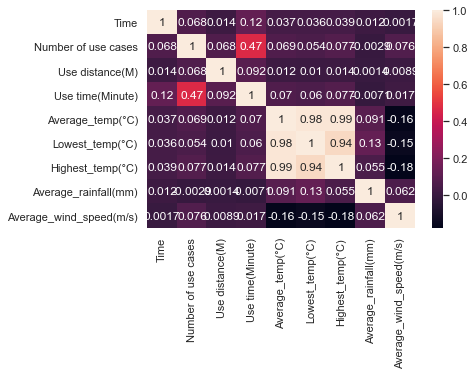

In [ ]:
sns.heatmap(pp.corr(), annot=True)

In [ ]:
pp.corr()

,Time,Number of use cases,Use distance(M),Use time(Minute),Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
Time,1.000000,0.067762,0.014405,0.123975,0.037491,0.035773,0.039070,0.012013,0.001720
Number of use cases,0.067762,1.000000,0.067790,0.471230,0.068656,0.053629,0.077461,-0.002934,0.075956
Use distance(M),0.014405,0.067790,1.000000,0.092365,0.012379,0.010139,0.013927,0.001420,0.008872
Use time(Minute),0.123975,0.471230,0.092365,1.000000,0.069874,0.060453,0.076754,-0.007091,0.017276
Average_temp(°C),0.037491,0.068656,0.012379,0.069874,1.000000,0.981924,0.985847,0.091262,-0.163999
Lowest_temp(°C),0.035773,0.053629,0.010139,0.060453,0.981924,1.000000,0.944428,0.126981,-0.146513
Highest_temp(°C),0.039070,0.077461,0.013927,0.076754,0.985847,0.944428,1.000000,0.055063,-0.176541
Average_rainfall(mm),0.012013,-0.002934,0.001420,-0.007091,0.091262,0.126981,0.055063,1.000000,0.062228
Average_wind_speed(m/s),0.001720,0.075956,0.008872,0.017276,-0.163999,-0.146513,-0.176541,0.062228,1.000000


## Sex Ratio

In [ ]:
pp['Date'] = pd.to_datetime(pp['Date'])

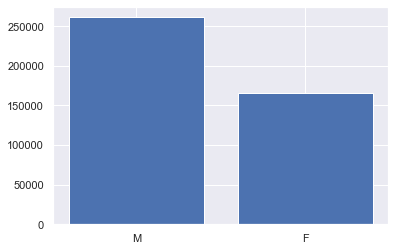

In [ ]:
table = pp['Sex'].value_counts()
plt.bar(table.index, table)
plt.show()

It shows that men are using '따릉이' more than women.

## Age group Ratio

C:\Users\IME\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\IME\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


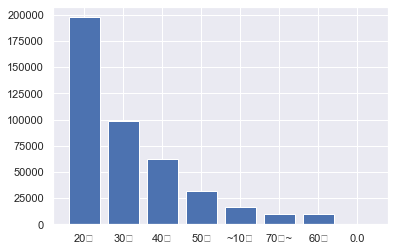

In [ ]:
table = pp['Age group'].value_counts()
plt.bar(table.index, table)
plt.show()

According to the chart above, people in their 20s are using '따릉이' the most, followed by 30s and 40s. People in 60s are using the least amount of '따릉이'.

In [ ]:
pp['Age group'].value_counts()

20대     197671
30대      98165
40대      62675
50대      31602
~10대     16722
70대~     10067
60대       9512
0.0         10
Name: Age group, dtype: int64

## Ticket Ratio

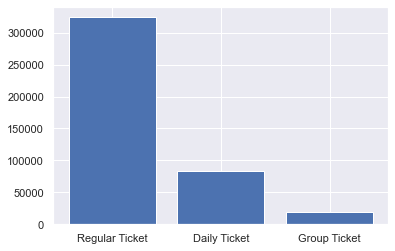

In [ ]:
table = pp['Rental code'].value_counts()
plt.bar(table.index, table)
plt.show()

The use of Regular tickets is overwhelmingly high, followed by Daily ticket, and Group ticket is the lowest.

### Utilization rate by year

In [ ]:
year_num=pp.groupby(['Date'])['Number of use cases'].aggregate(['sum'])
year_num

,sum
Date,
2017-01-01,21
2017-01-02,35
2017-01-03,37
2017-01-04,47
2017-01-05,49
...,...
2020-06-11,1003
2020-06-12,1068
2020-06-13,910


In [ ]:
year_num = year_num.resample('Y').sum()
year_num.index = ['2017', '2018', '2019', '2020']
year_num

,sum
2017,48169
2018,76119
2019,310849
2020,55315


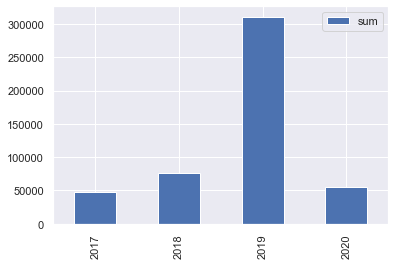

In [ ]:
year_num.plot.bar()

The usage rate was the highest in 2019, when the number of rental shop soared. The year 2020 was low because only first-half data was collected.


### Utilization rate by District

In [ ]:
rental_num=pp.groupby(['Rental place'])['Number of use cases'].aggregate(['sum'])
rental_num

,sum
Rental place,
강남,14411
강동,10268
강북,5299
강서,17476
관악,12360
관악(레),8476
광진,9609
구로,11677
금천,4767


In [ ]:
rental_num.index = ["Gangnam", "Gangdong", "Gangbuk", "Gangseo", "Gwanak", "Gwanak-Re", "Gwangjin", "Guro", "Geumcheon", "Nowon", "Dobong",
"Dongdaemoon", "Mapo", "Seodaemon", "Seocho", "Seongdong", "Seongbuk", "Songpa", "Yangcheon", "Yeongdeungpo", "Yongsan", "Eunpyeong",
"Jung-gu", "Jung-rang"]

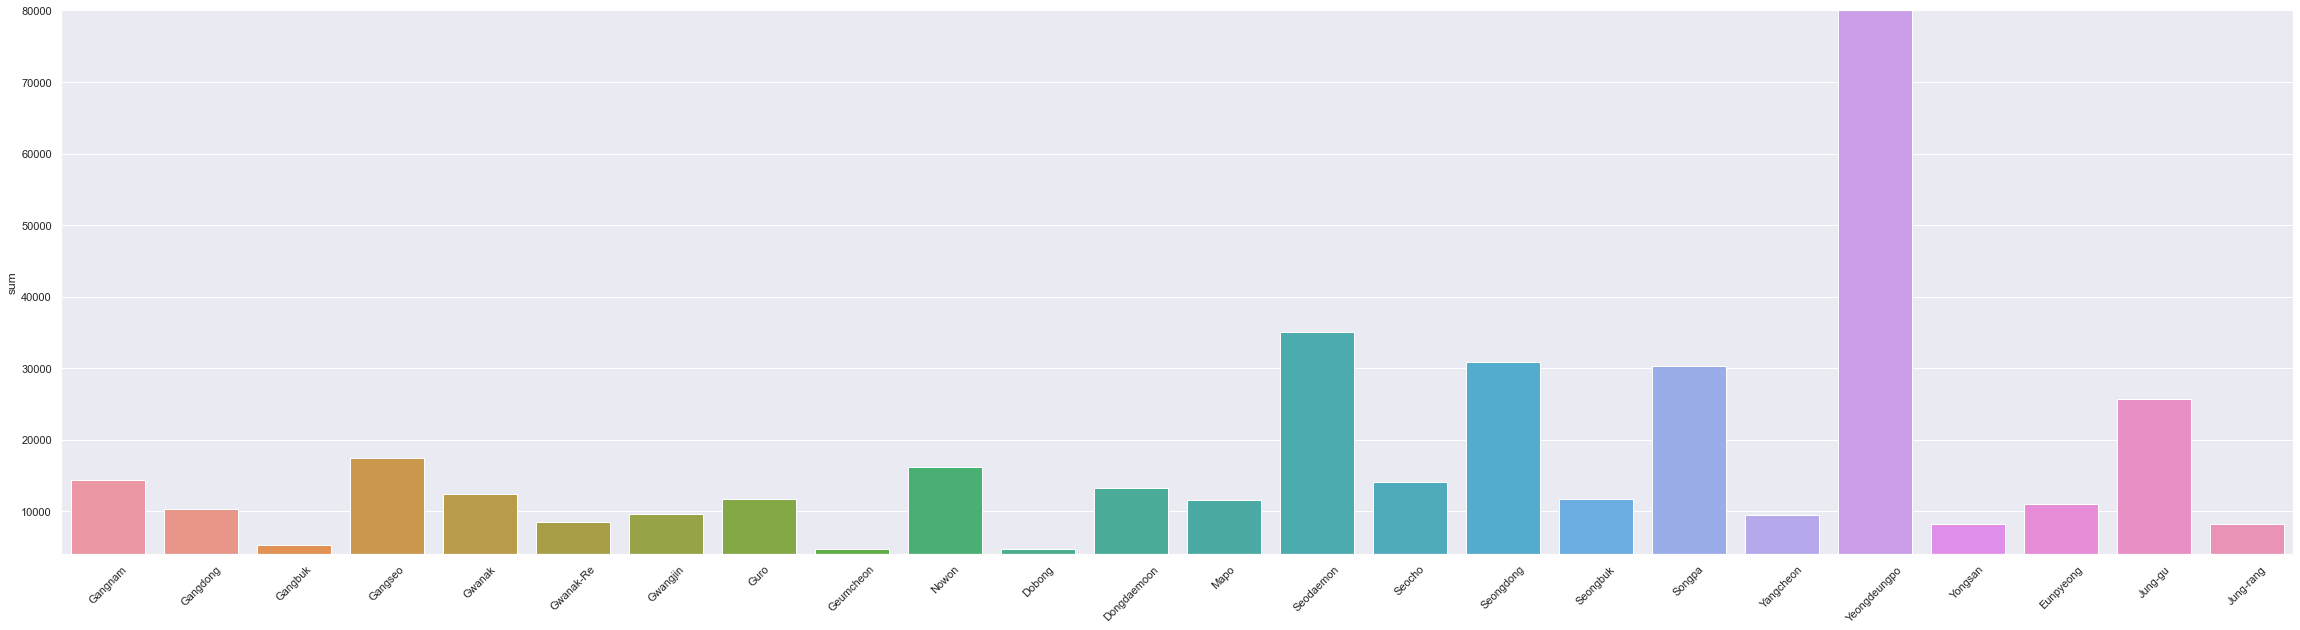

In [ ]:
fig, ax = plt.subplots(figsize = (40,10))
plt.xticks(rotation = 45 )
sns.barplot(data=rental_num , x=rental_num.index , y='sum')
plt.ylim(4000,80000)
plt.xlim()
plt.show()

 The top 4 of the regional utilization rates were Yeongdeungpo, Seodaemun, Seongdong, and Songpa, with the lowest utilization rates in Gangbuk, Geumcheon and Dobong. Yeouido, which belongs to Yeongdeungpo, is expected to have the highest utilization rate due to the overwhelming number of companies, heavy traffic, and many people using bicycles at the nearby Hangang Park.


### Utilization rate by Time zone

In [ ]:
Time_num = pp.groupby(['Time'])['Number of use cases'].aggregate(['sum'])
Time_num

,sum
Time,
0,14376
1,12234
2,8826
3,5758
4,3656
5,3616
6,6977
7,15752
8,28485


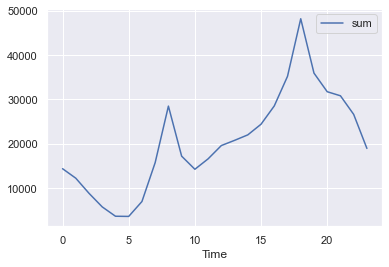

In [ ]:
Time_num.plot()

Time-to-time utilization was generally higher in the afternoon than in the morning. The utilization rate was high in the order of 18:00, 19:00, 17:00 and 20:00, and the utilization rate was the highest at 8:00 in the morning. This shows that bike riding is concentrated during rush hour.

In [ ]:
Time_num.sort_values(by='sum', ascending=False)

,sum
Time,
18,48185
19,35929
17,35201
20,31732
21,30813
16,28529
8,28485
22,26621
15,24404


### Utilization rate by Day of the Week

In [ ]:
date_num=pp.groupby(['Date'])['Number of use cases'].aggregate(['sum'])
date_num

,sum
Date,
2017-01-01,21
2017-01-02,35
2017-01-03,37
2017-01-04,47
2017-01-05,49
...,...
2020-06-11,1003
2020-06-12,1068
2020-06-13,910


In [ ]:
date_num=date_num.groupby(date_num.index.dayofweek).sum()
date_num

,sum
Date,
0,78192
1,74750
2,68260
3,61528
4,66112
5,73467
6,68143


(60000.0, 100000.0)

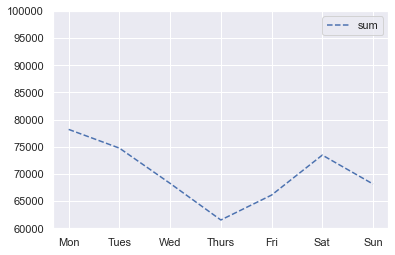

In [ ]:
date_num.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
date_num.plot(style=['--']);
plt.ylim([60000,100000])

The utilization rates for each day of the week were followed by Monday, Tuesday, Saturday, Wednesday, Sunday, Friday and Thursday.

### Utilization rate by Year - month

In [ ]:
month_num=pp.groupby(['Date'])['Number of use cases'].aggregate(['sum'])
month_num

,sum
Date,
2017-01-01,21
2017-01-02,35
2017-01-03,37
2017-01-04,47
2017-01-05,49
...,...
2020-06-11,1003
2020-06-12,1068
2020-06-13,910


In [ ]:
month_num=month_num.resample('M').sum()
month_num

,sum
Date,
2017-01-31,824
2017-02-28,846
2017-03-31,1873
2017-04-30,3167
2017-05-31,4508
2017-06-30,5342
2017-07-31,3717
2017-08-31,5021
2017-09-30,8365


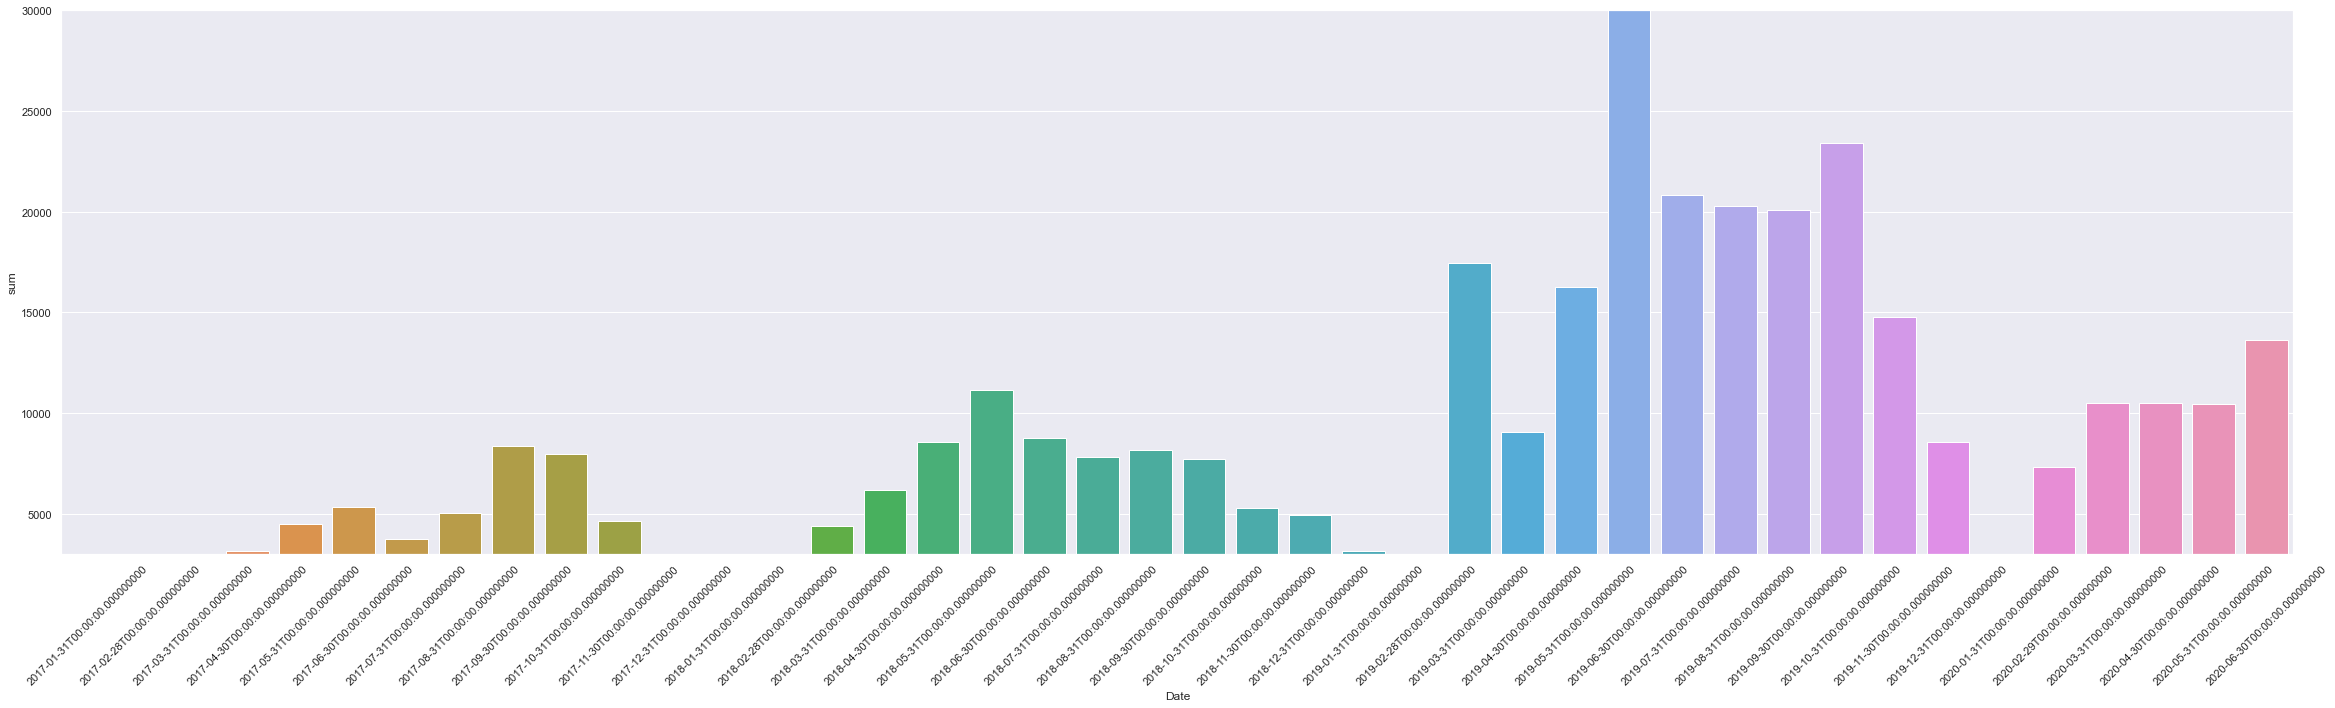

In [ ]:
fig, ax = plt.subplots(figsize = (40,10))
plt.xticks(rotation = 45 )
sns.barplot(data=month_num , x=month_num.index , y='sum')
plt.ylim(3000,30000)
plt.xlim()
plt.show()

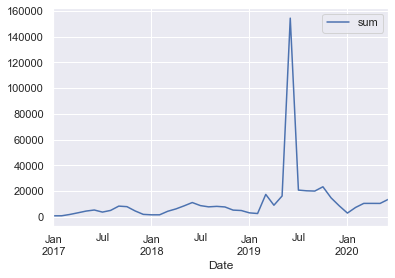

In [ ]:
month_num.plot()

### The amount of use in 2020 was erased to check the total number of uses on a monthly basis. Because, 2020 has data until Jun

In [ ]:
month_num.loc['2020']

,sum
Date,
2020-01-31,2953
2020-02-29,7329
2020-03-31,10479
2020-04-30,10486
2020-05-31,10460
2020-06-30,13608


In [ ]:
month_num.reset_index()

,Date,sum
0,2017-01-31,824
1,2017-02-28,846
2,2017-03-31,1873
3,2017-04-30,3167
4,2017-05-31,4508
5,2017-06-30,5342
6,2017-07-31,3717
7,2017-08-31,5021
8,2017-09-30,8365
9,2017-10-31,7944


In [ ]:
month_num.drop(month_num.index[36:42], inplace=True)

### To check out the number of monthly use cases, we looked at the data for three years from 2017 to 2019.

In [ ]:
month_num

,sum
Date,
2017-01-31,824
2017-02-28,846
2017-03-31,1873
2017-04-30,3167
2017-05-31,4508
2017-06-30,5342
2017-07-31,3717
2017-08-31,5021
2017-09-30,8365


### Change the format of 'Date' to month

In [ ]:
month_num.index = pd.date_range('1/1/2017' , '12/31/2019', freq='MS').strftime('%B')
month_num

,sum
January,824
February,846
March,1873
April,3167
May,4508
June,5342
July,3717
August,5021
September,8365
October,7944


### Total Monthly Usage (2020 Exclusion)

In [ ]:
month_num=month_num.groupby(level=0).agg(sum)
month_num

,sum
April,18411
August,33084
December,15472
February,5062
January,5541
July,33285
June,170948
March,23715
May,29319
November,24655


In [ ]:
m1 = month_num.reindex(index=['January','February','March','April','May','June','July'
                     ,'August','September','October','November','December']) 
m1

,sum
January,5541
February,5062
March,23715
April,18411
May,29319
June,170948
July,33285
August,33084
September,36596
October,39049


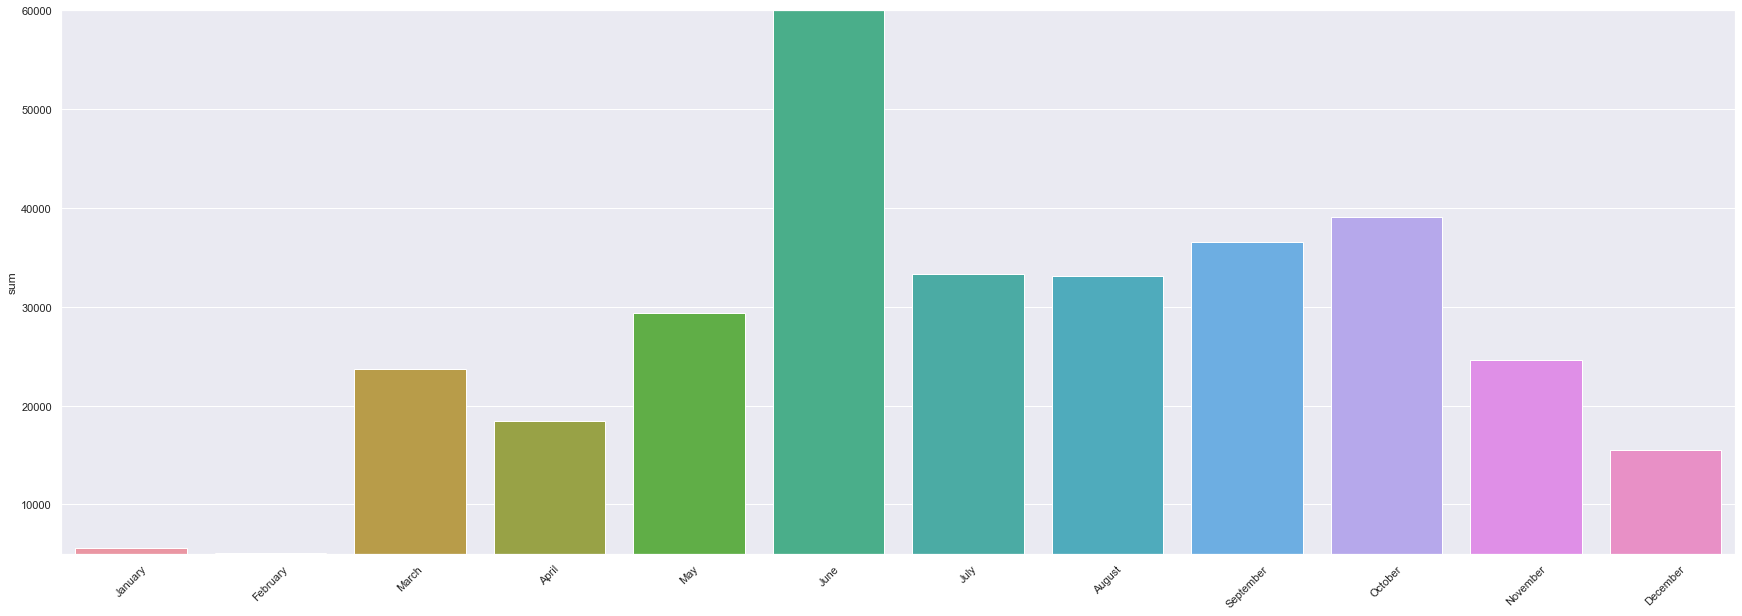

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
plt.xticks(rotation = 45 )
sns.barplot(data= m1 , x= m1.index , y='sum')
plt.ylim(5000,60000)
plt.xlim()
plt.show()




The utilization rates for each day of the week were followed by Monday, Tuesday, Saturday, Wednesday, Sunday, Friday and Thursday.

### Utilization rate by Weather

(-20.0, 35.0)

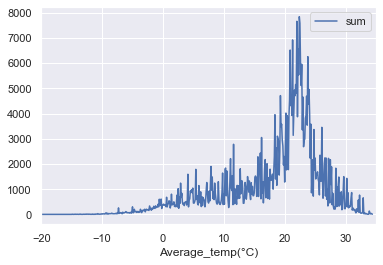

In [ ]:
temp_use=pp.groupby(['Average_temp(°C)'])['Number of use cases'].aggregate(['sum'])
temp_use
plt2 = temp_use.plot(style=['-']);
plt.xlim([-20,35])

It showed the highest usage when the temperature was about 20 degrees.

## Visualize by year and month

In [ ]:
e = pp.groupby('Date')[['Number of use cases']].aggregate('sum')
e

,Number of use cases
Date,
2017-01-01,21
2017-01-02,35
2017-01-03,37
2017-01-04,47
2017-01-05,49
...,...
2020-06-11,1003
2020-06-12,1068
2020-06-13,910


In [ ]:
e.reset_index(inplace = True)

In [ ]:
e['month'] = e['Date'].dt.month
e['year'] = e['Date'].dt.year

In [ ]:
ee = e.groupby(['year', 'month'])[['Number of use cases']].aggregate('sum')
ee = ee.unstack()
ee

Number of use cases                                               \
month                  1       2        3        4        5         6    
year                                                                     
2017                824.0   846.0   1873.0   3167.0   4508.0    5342.0   
2018               1594.0  1605.0   4372.0   6190.0   8571.0   11142.0   
2019               3123.0  2611.0  17470.0   9054.0  16240.0  154464.0   
2020               2953.0  7329.0  10479.0  10486.0  10460.0   13608.0   

                                                            
month       7        8        9        10       11      12  
year                                                        
2017    3717.0   5021.0   8365.0   7944.0   4619.0  1943.0  
2018    8758.0   7795.0   8170.0   7710.0   5266.0  4946.0  
2019   20810.0  20268.0  20061.0  23395.0  14770.0  8583.0  
2020       NaN      NaN      NaN      NaN      NaN     NaN

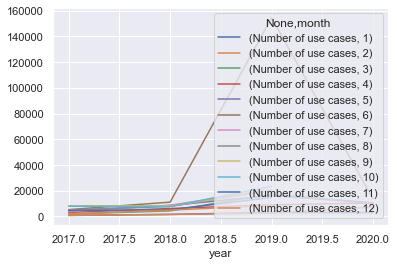

In [ ]:
ee.plot()

In [ ]:
ee = ee.T

In [ ]:
ee.reset_index(inplace = True)

In [ ]:
ee

year,level_0,month,2017,2018,2019,2020
0,Number of use cases,1,824.0,1594.0,3123.0,2953.0
1,Number of use cases,2,846.0,1605.0,2611.0,7329.0
2,Number of use cases,3,1873.0,4372.0,17470.0,10479.0
3,Number of use cases,4,3167.0,6190.0,9054.0,10486.0
4,Number of use cases,5,4508.0,8571.0,16240.0,10460.0
5,Number of use cases,6,5342.0,11142.0,154464.0,13608.0
6,Number of use cases,7,3717.0,8758.0,20810.0,NaN
7,Number of use cases,8,5021.0,7795.0,20268.0,NaN
8,Number of use cases,9,8365.0,8170.0,20061.0,NaN
9,Number of use cases,10,7944.0,7710.0,23395.0,NaN


In [ ]:
ee.drop('level_0', axis = 1 , inplace =True)
ee.drop('month', axis = 1 , inplace =True)

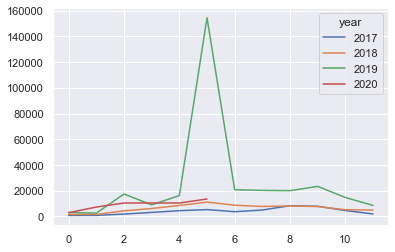

In [ ]:
ee.plot()

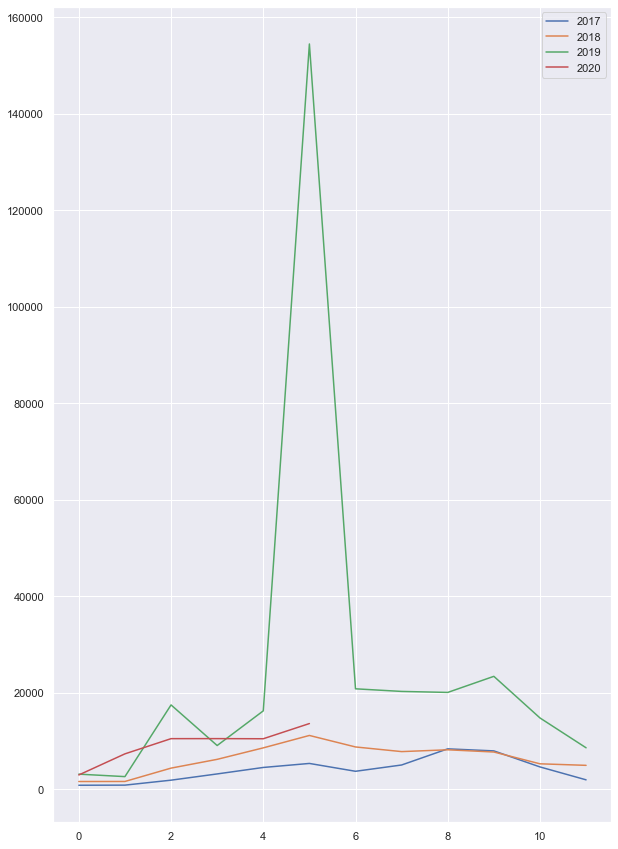

In [ ]:
fig = plt.figure(figsize = (10 , 15))
ax = fig.add_subplot(1,1,1)
ax.plot(ee)
plt.legend(['2017','2018','2019','2020'], loc = 'upper right');
plt.show()

The usage rate was the highest in 2019, when the number of rental shop soared. The year 2020 was low because only first-half data was collected.

In [ ]:
data=pd.read_csv('data/Realfinal_data.csv')

## Clustering - Analysis of Utilization by Weekdays/Weekends

In [ ]:
data

,Unnamed: 0,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute),Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,0,2017-01-01,9,영등포,Regular Ticket,M,30대,1.0,당산육갑문,11010.0,45.0,4.9,0.8,8.7,0.0,0.4
1,1,2017-01-01,7,중구,Regular Ticket,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0,3.4,-0.4,6.7,0.0,1.1
2,2,2017-01-01,0,영등포,Regular Ticket,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0,4.9,0.8,8.7,0.0,0.4
3,3,2017-01-01,18,서대문,Daily Ticket,F,30대,1.0,서강나루 공원,6900.0,39.0,3.9,0.3,7.5,0.0,1.6
4,4,2017-01-01,21,성동,Regular Ticket,F,20대,1.0,청계8가사거리 부근,2140.0,12.0,4.6,0.5,7.9,0.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426419,426423,2020-06-15,5,관악,Regular Ticket,F,20대,1.0,2174. 삼성디지털프라자관악점,0.0,136.0,20.9,16.6,26.3,0.0,2.8
426420,426424,2020-06-15,9,영등포,Regular Ticket,F,20대,1.0,262. 영문초등학교 사거리,0.0,14.0,23.3,19.0,29.0,0.0,1.7
426421,426425,2020-06-15,7,강동,Regular Ticket,F,~10대,1.0,1088.풍납사거리(강동),0.0,8.0,23.7,19.0,29.9,0.0,2.2
426422,426426,2020-06-15,8,노원,Regular Ticket,F,40대,1.0,2903.월계초안아파트 1단지,0.0,18.0,23.3,15.3,30.5,0.0,1.6


In [ ]:
import datetime as dt
from dateutil import parser
from datetime import datetime 

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426424 entries, 0 to 426423
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               426424 non-null  int64         
 1   Date                     426424 non-null  datetime64[ns]
 2   Time                     426424 non-null  int64         
 3   Rental place             426424 non-null  object        
 4   Rental code              426424 non-null  object        
 5   Sex                      426424 non-null  object        
 6   Age group                426424 non-null  object        
 7   Number of use cases      426424 non-null  float64       
 8   Rental Name              426424 non-null  object        
 9   Use distance(M)          426424 non-null  float64       
 10  Use time(Minute)         426424 non-null  float64       
 11  Average_temp(°C)         426424 non-null  float64       
 12  Lowest_temp(°C) 

In [ ]:
#Add Day of the Week column by Date
data['dayofweek'] = data['Date'].dt.day_name()
data

,Unnamed: 0,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute),Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s),dayofweek
0,0,2017-01-01,9,영등포,Regular Ticket,M,30대,1.0,당산육갑문,11010.0,45.0,4.9,0.8,8.7,0.0,0.4,Sunday
1,1,2017-01-01,7,중구,Regular Ticket,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0,3.4,-0.4,6.7,0.0,1.1,Sunday
2,2,2017-01-01,0,영등포,Regular Ticket,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0,4.9,0.8,8.7,0.0,0.4,Sunday
3,3,2017-01-01,18,서대문,Daily Ticket,F,30대,1.0,서강나루 공원,6900.0,39.0,3.9,0.3,7.5,0.0,1.6,Sunday
4,4,2017-01-01,21,성동,Regular Ticket,F,20대,1.0,청계8가사거리 부근,2140.0,12.0,4.6,0.5,7.9,0.0,0.7,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426419,426423,2020-06-15,5,관악,Regular Ticket,F,20대,1.0,2174. 삼성디지털프라자관악점,0.0,136.0,20.9,16.6,26.3,0.0,2.8,Monday
426420,426424,2020-06-15,9,영등포,Regular Ticket,F,20대,1.0,262. 영문초등학교 사거리,0.0,14.0,23.3,19.0,29.0,0.0,1.7,Monday
426421,426425,2020-06-15,7,강동,Regular Ticket,F,~10대,1.0,1088.풍납사거리(강동),0.0,8.0,23.7,19.0,29.9,0.0,2.2,Monday
426422,426426,2020-06-15,8,노원,Regular Ticket,F,40대,1.0,2903.월계초안아파트 1단지,0.0,18.0,23.3,15.3,30.5,0.0,1.6,Monday


In [ ]:
#Select only the columns required for analysis
data12 = data.drop(["Unnamed: 0","Date","Time","Rental code","Sex",
           "Age group","Rental Name",
           "Use distance(M)","Use time(Minute)","Average_temp(°C)",
                   "Lowest_temp(°C)","Average_rainfall(mm)","Average_wind_speed(m/s)",
           "Highest_temp(°C)"],
                  axis=1)
data12

,Rental place,Number of use cases,dayofweek
0,영등포,1.0,Sunday
1,중구,1.0,Sunday
2,영등포,1.0,Sunday
3,서대문,1.0,Sunday
4,성동,1.0,Sunday
...,...,...,...
426419,관악,1.0,Monday
426420,영등포,1.0,Monday
426421,강동,1.0,Monday
426422,노원,1.0,Monday


In [ ]:
#group by for 'Day of week','Rental place'
data13 = data12.groupby(['dayofweek','Rental place']).aggregate({ "Number of use cases": 'sum'}).reset_index()
data13

,dayofweek,Rental place,Number of use cases
0,Friday,강남,1905.0
1,Friday,강동,1306.0
2,Friday,강북,625.0
3,Friday,강서,2141.0
4,Friday,관악,1589.0
...,...,...,...
163,Wednesday,영등포,23966.0
164,Wednesday,용산,1064.0
165,Wednesday,은평,1310.0
166,Wednesday,중구,3791.0


In [ ]:
# Convert to Weekdays:1, Weekend:0
data13['dayofweek'] = data13.dayofweek.map({'Monday':1,'Tuesday':1,
                            'Wendnesday':1,'Thursday':1,
                            'Friday':1,'Saturday':0,'Sunday':0})
data13

,dayofweek,Rental place,Number of use cases
0,1.0,강남,1905.0
1,1.0,강동,1306.0
2,1.0,강북,625.0
3,1.0,강서,2141.0
4,1.0,관악,1589.0
...,...,...,...
163,NaN,영등포,23966.0
164,NaN,용산,1064.0
165,NaN,은평,1310.0
166,NaN,중구,3791.0


In [ ]:
# Rename Column(Rental place -> data_category)
data14 = data13.groupby(['dayofweek','Rental place']).aggregate({ "Number of use cases": 'sum'}).reset_index()

In [ ]:
data14.rename(columns={data14.columns[0]:"day_category"},inplace=True)
data14

,day_category,Rental place,Number of use cases
0,0.0,강남,4011.0
1,0.0,강동,3367.0
2,0.0,강북,1846.0
3,0.0,강서,5520.0
4,0.0,관악,4268.0
5,0.0,관악(레),2569.0
6,0.0,광진,3215.0
7,0.0,구로,3194.0
8,0.0,금천,1054.0
9,0.0,노원,4912.0


In [ ]:
# dw0 = Extract weekend data only
dw0=data14[data14['day_category'] == 0]
dw0

,day_category,Rental place,Number of use cases
0,0.0,강남,4011.0
1,0.0,강동,3367.0
2,0.0,강북,1846.0
3,0.0,강서,5520.0
4,0.0,관악,4268.0
5,0.0,관악(레),2569.0
6,0.0,광진,3215.0
7,0.0,구로,3194.0
8,0.0,금천,1054.0
9,0.0,노원,4912.0


In [ ]:
# dw1 = Extract weekday data only
dw1=data14[data14['day_category'] == 1]
dw1

,day_category,Rental place,Number of use cases
24,1.0,강남,8521.0
25,1.0,강동,5467.0
26,1.0,강북,2724.0
27,1.0,강서,9648.0
28,1.0,관악,6570.0
29,1.0,관악(레),4613.0
30,1.0,광진,5198.0
31,1.0,구로,6807.0
32,1.0,금천,3051.0
33,1.0,노원,8786.0


In [ ]:
# Applying weights to the 'Number of use cases' of weekday data
# (Because the weekdays are 5 days, weekends are 2 days.)
dw1['weight number'] = dw1['Number of use cases']*2/5
dw1

<ipython-input-225-66d9ed9c3585>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dw1['weight number'] = dw1['Number of use cases']*2/5


,day_category,Rental place,Number of use cases,weight number
24,1.0,강남,8521.0,3408.4
25,1.0,강동,5467.0,2186.8
26,1.0,강북,2724.0,1089.6
27,1.0,강서,9648.0,3859.2
28,1.0,관악,6570.0,2628.0
29,1.0,관악(레),4613.0,1845.2
30,1.0,광진,5198.0,2079.2
31,1.0,구로,6807.0,2722.8
32,1.0,금천,3051.0,1220.4
33,1.0,노원,8786.0,3514.4


In [ ]:
# Drop the 'Number of use cases' before applying the weight,
# and replace weighted Number of use cases.
dw1 = dw1.drop(["Number of use cases"], axis=1)
dw1.rename(columns={dw1.columns[2]:"Number of use cases"},inplace=True)

In [ ]:
dw1

,day_category,Rental place,Number of use cases
24,1.0,강남,3408.4
25,1.0,강동,2186.8
26,1.0,강북,1089.6
27,1.0,강서,3859.2
28,1.0,관악,2628.0
29,1.0,관악(레),1845.2
30,1.0,광진,2079.2
31,1.0,구로,2722.8
32,1.0,금천,1220.4
33,1.0,노원,3514.4


In [ ]:
#Weighted Completed Data(Weekdays + Weekends)
data15 = pd.concat([dw0,dw1], axis=0)
data15  #weekday= 1, weekends = 0

,day_category,Rental place,Number of use cases
0,0.0,강남,4011.0
1,0.0,강동,3367.0
2,0.0,강북,1846.0
3,0.0,강서,5520.0
4,0.0,관악,4268.0
5,0.0,관악(레),2569.0
6,0.0,광진,3215.0
7,0.0,구로,3194.0
8,0.0,금천,1054.0
9,0.0,노원,4912.0


In [ ]:
data15['Number of use cases'].quantile(q=0.33, interpolation='nearest')

2713.0

In [ ]:
data15['Number of use cases'].quantile(q=0.66, interpolation='nearest')

3846.0

In [ ]:
#Category of low, medium, and high usage
nums3 = data15['Number of use cases']

low_range = (nums3 <= 2713)
data15.loc[low_range, 'Number of use cases'] = 'low'

medium_range = (nums3 > 2713) & (nums3 <= 3846)
data15.loc[medium_range, 'Number of use cases'] = 'medium'

high_range = (nums3 > 3846) 
data15.loc[high_range, 'Number of use cases'] = 'high'

In [ ]:
data15

,day_category,Rental place,Number of use cases
0,0.0,강남,high
1,0.0,강동,medium
2,0.0,강북,low
3,0.0,강서,high
4,0.0,관악,high
5,0.0,관악(레),low
6,0.0,광진,medium
7,0.0,구로,medium
8,0.0,금천,low
9,0.0,노원,high


In [ ]:
#'Rental place', 'day of week' is categorical data, so convert to dummy variable
reg = pd.get_dummies(data15['Rental place'], prefix='_')
dow = pd.get_dummies(data15['day_category'], prefix='_')

data16 = pd.concat([data15,reg,dow],axis=1)
data16

,day_category,Rental place,Number of use cases,__강남,__강동,__강북,__강서,__관악,__관악(레),__광진,...,__성북,__송파,__양천,__영등포,__용산,__은평,__중구,__중랑,__0.0,__1.0
0,0.0,강남,high,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,강동,medium,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,강북,low,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,강서,high,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,관악,high,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0.0,관악(레),low,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,0.0,광진,medium,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,0.0,구로,medium,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0.0,금천,low,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0.0,노원,high,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_data16 = data16.drop(['Number of use cases','Rental place','day_category'],axis=1)
y_data16 = data16['Number of use cases']

### Because clustering was carried out categorically, the elbow method and silhouette method were not used.
### K number was set as the number of categories 3.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
# k-means Clustering (k=3)
model = KMeans(n_clusters=3,random_state=1)

In [ ]:
model.fit(x_data16)

KMeans(n_clusters=3, random_state=1)

In [ ]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
y_predict = model.predict(x_data16)

In [ ]:
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Matching cluster
data17 = data16
data17['cluster'] = model.labels_
data17

,day_category,Rental place,Number of use cases,__강남,__강동,__강북,__강서,__관악,__관악(레),__광진,...,__송파,__양천,__영등포,__용산,__은평,__중구,__중랑,__0.0,__1.0,cluster
0,0.0,강남,high,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,강동,medium,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,강북,low,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,강서,high,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,관악,high,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0.0,관악(레),low,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,0.0,광진,medium,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,0.0,구로,medium,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,금천,low,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.0,노원,high,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#cluster0
c0_tr_w=data17[data17['cluster'] == 0]
c0_tr_w['Number of use cases'].value_counts()

high      10
medium     8
low        5
Name: Number of use cases, dtype: int64

-> Cluster0 is a cluster with high usage.

In [ ]:
#Extract only high usage cases from cluster0
c0_tr_w_high = c0_tr_w[c0_tr_w['Number of use cases']=='high']
c0_tr_w_high

,day_category,Rental place,Number of use cases,__강남,__강동,__강북,__강서,__관악,__관악(레),__광진,...,__송파,__양천,__영등포,__용산,__은평,__중구,__중랑,__0.0,__1.0,cluster
0,0.0,강남,high,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,강서,high,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,관악,high,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.0,노원,high,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,0.0,서대문,high,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0.0,서초,high,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,0.0,성동,high,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,0.0,송파,high,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
19,0.0,영등포,high,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
22,0.0,중구,high,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


- On weekends, Gangnam, Gangseo, Gwanak, Nowon, Seodaemun, Seocho, Seongdong, Songpa, Yeongdeungpo, and Jung-gu have a high rate of bicycle use.
- These areas are near lakes or the Han River, and because they are downtown, they have a large floating population on weekends, which seems to have a high rate of weekend bike use.
(주말에는 강남·강서·관악·노원·서대문·서초·성동·송파·영등포·중구가 자전거 이용률이 높다. 이 지역들은 호수나 한강 근처이고, 도심이기 때문에 주말에 유동인구가 많아서, 주말 자전거 이용률이 높은 것으로 보인다.)

In [ ]:
#cluster1
c1_tr_w=data17[data17['cluster'] == 1]
c1_tr_w['Number of use cases'].value_counts()

low       12
high       6
medium     6
Name: Number of use cases, dtype: int64

-> Cluster1 is a cluster with low usage.

In [ ]:
#Extract only low usage cases from cluster1
c1_tr_w_low = c1_tr_w[c1_tr_w['Number of use cases']=='low']
c1_tr_w_low

,day_category,Rental place,Number of use cases,__강남,__강동,__강북,__강서,__관악,__관악(레),__광진,...,__송파,__양천,__영등포,__용산,__은평,__중구,__중랑,__0.0,__1.0,cluster
25,1.0,강동,low,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
26,1.0,강북,low,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
28,1.0,관악,low,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
29,1.0,관악(레),low,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,1.0,광진,low,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
32,1.0,금천,low,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
34,1.0,도봉,low,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
40,1.0,성북,low,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
42,1.0,양천,low,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
44,1.0,용산,low,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


- On weekdays, the rate of bicycle use in Gangdong, Gangbuk, Gwanak, Gwangjin, Geumcheon, Dobong, Seongbuk, Yangcheon, Yongsan, Eunpyeong and Jungnang are low.
-  These areas have a low floating population on weekdays, because they have dense residential areas and few companies or universities. So it seems that the rate of use of bicycles on weekdays is low.(평일에는 강동, 강북, 관악, 광진, 금천, 도봉, 성북, 양천, 용산, 은평, 중랑이 자전거 이용률이 낮다. 이 지역들은 주택가가 밀집해있고 회사나 대학교가 거의 없기때문에, 유동인구가 적어서 평일 자전거 이용률이 낮은 것으로 보인다.)

In [ ]:
data18 = data.drop(["Unnamed: 0","Date","Rental code","Sex",
           "Age group","Rental Name",
           "Use distance(M)","Use time(Minute)","Lowest_temp(°C)",
           "Highest_temp(°C)","dayofweek"],
                  axis=1)

In [ ]:
data19 = data18.groupby(['Rental place','Time']).aggregate({ "Number of use cases": 'sum' , 'Average_temp(°C)': 'mean','Average_rainfall(mm)':'mean','Average_wind_speed(m/s)': 'mean'}).reset_index()
data19

,Rental place,Time,Number of use cases,Average_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,강남,0,350.0,17.746177,1.856269,1.244954
1,강남,1,438.0,17.971429,2.100765,1.274235
2,강남,2,330.0,18.632198,1.795666,1.218266
3,강남,3,208.0,18.743069,1.955446,1.256436
4,강남,4,106.0,17.056180,5.353933,1.325843
...,...,...,...,...,...,...
571,중랑,19,693.0,20.133395,0.269017,1.990538
572,중랑,20,562.0,19.983948,1.625813,2.043167
573,중랑,21,593.0,19.860080,1.901198,2.023353
574,중랑,22,579.0,20.073102,1.789588,2.022560


### - Determine k

In [ ]:
# Using Elbow method
feature_cols = data19.columns[3:]
X = data19[feature_cols]
y = data19['Number of use cases']

In [ ]:
X

,Average_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,17.746177,1.856269,1.244954
1,17.971429,2.100765,1.274235
2,18.632198,1.795666,1.218266
3,18.743069,1.955446,1.256436
4,17.056180,5.353933,1.325843
...,...,...,...
571,20.133395,0.269017,1.990538
572,19.983948,1.625813,2.043167
573,19.860080,1.901198,2.023353
574,20.073102,1.789588,2.022560


In [ ]:
X=X.values

In [ ]:
seed = 0
elbow = dict()
for k in range(1,11): 
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(X)
    inertia = estimator.inertia_
    elbow[k] = inertia

In [ ]:
elbow

{1: 2003.5989913003218,
 2: 1166.4621339539915,
 3: 898.0324345418376,
 4: 686.874866681208,
 5: 578.28583770995,
 6: 507.19303481108756,
 7: 446.17212776883014,
 8: 388.85916357984183,
 9: 355.8237442510476,
 10: 331.6056972626624}

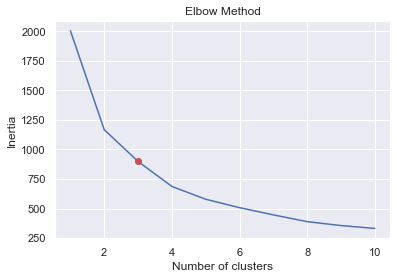

In [ ]:
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(3,elbow_df[3],'ro')

-> Best K is 3

In [ ]:
#Using silhouette method

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.38784086652031735
For n_clusters = 3 The average silhouette_score is : 0.3086683466596992


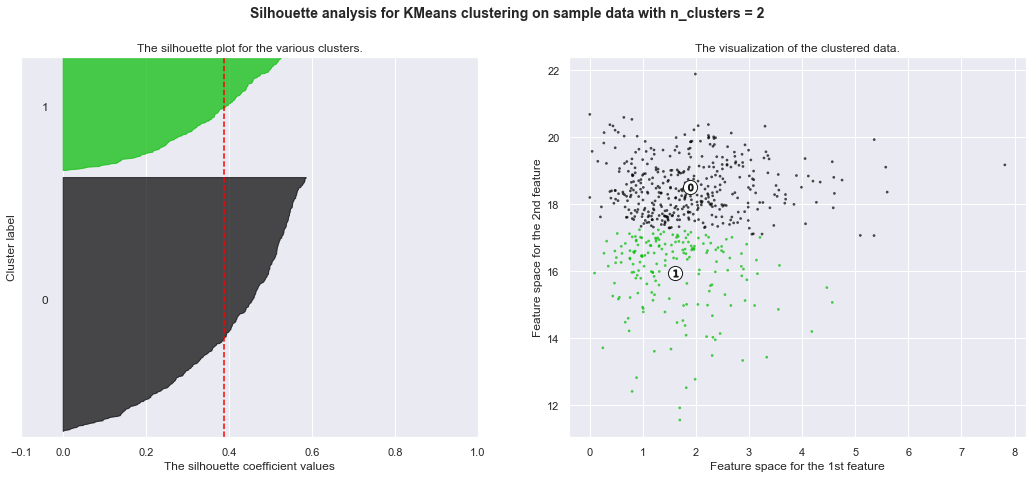

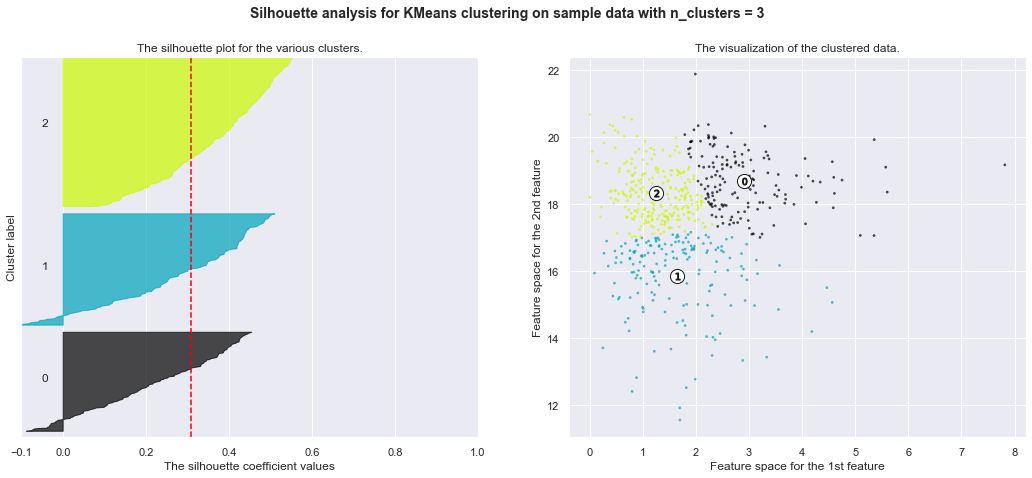

In [ ]:
seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,4)

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 3])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg


    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

     
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 1], X[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_
   
    ax2.scatter(centers[:,1], centers[:,0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


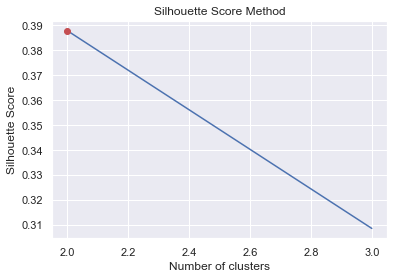

In [ ]:
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(2,silhouette_df[2],'ro')

-> Best k is 2

The number of use cases has three categories: low, medium, and high,
So, We decided K as 3.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Running k-means clustering using weather data

df_w = pd.DataFrame(data19, columns=['Rental place','Time', "Number of use cases", 'Average_temp(°C)', 'Average_rainfall(mm)', 'Average_wind_speed(m/s)'])
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(df_w[['Average_temp(°C)', 'Average_rainfall(mm)', 'Average_wind_speed(m/s)']])

df_w['Cluster'] = y

In [ ]:
df_w

,Rental place,Time,Number of use cases,Average_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s),Cluster
0,강남,0,350.0,17.746177,1.856269,1.244954,0
1,강남,1,438.0,17.971429,2.100765,1.274235,0
2,강남,2,330.0,18.632198,1.795666,1.218266,0
3,강남,3,208.0,18.743069,1.955446,1.256436,0
4,강남,4,106.0,17.056180,5.353933,1.325843,2
...,...,...,...,...,...,...,...
571,중랑,19,693.0,20.133395,0.269017,1.990538,0
572,중랑,20,562.0,19.983948,1.625813,2.043167,0
573,중랑,21,593.0,19.860080,1.901198,2.023353,2
574,중랑,22,579.0,20.073102,1.789588,2.022560,2


In [ ]:
# Bicycle Utilization by Cluster

use_analysis_data = df_w.groupby(['Cluster']).aggregate({ "Number of use cases": 'mean' , 'Average_temp(°C)': 'mean','Average_rainfall(mm)':'mean','Average_wind_speed(m/s)': 'mean'}).reset_index()

In [ ]:
use_analysis_data

,Cluster,Number of use cases,Average_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,0,835.122530,18.295021,1.241802,1.598610
1,1,581.390533,15.828208,1.646997,1.653081
2,2,1174.746753,18.698340,2.903674,1.615559


In [ ]:
#Ratio of clusters by region

place_analysis_data = df_w.groupby(by = ['Rental place', 'Cluster']).count()

In [ ]:
place_analysis_data

Time  Number of use cases  Average_temp(°C)  \
Rental place Cluster                                                
강남           0          14                   14                14   
             2          10                   10                10   
강동           0          18                   18                18   
             1           3                    3                 3   
             2           3                    3                 3   
...                    ...                  ...               ...   
중구           0           1                    1                 1   
             1          23                   23                23   
중랑           0          15                   15                15   
             1           1                    1                 1   
             2           8                    8                 8   

                      Average_rainfall(mm)  Average_wind_speed(m/s)  
Rental place Cluster                                                 
강남           0                          14                       14  
             2                          10                       10  
강동           0                          18                       18  
             1                           3                        3  
             2                           3                        3  
...                                    ...                      ...  
중구           0                           1                        1  
             1                          23                       23  
중랑           0                          15                       15  
             1                           1                        1  
             2                           8                        8  

[65 rows x 5 columns]

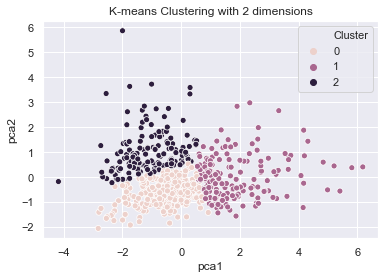

In [ ]:
#Use PCA Dimension Modules to visualize clustering results
reduced_data = PCA(n_components=2).fit_transform(df_w[['Average_temp(°C)', 'Average_rainfall(mm)', 'Average_wind_speed(m/s)']])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

#print(results)
sns.scatterplot(x="pca1", y="pca2", hue=df_w['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

-> Clusters did not form well. Therefore, weather data do not have a big impact on bicycle usage rate.

## Association Rule

In [ ]:
f = pd.read_csv('data/Realfinal_data.csv')

In [ ]:
f.head()

,Unnamed: 0,Date,Time,Rental place,Rental code,Sex,Age group,Number of use cases,Rental Name,Use distance(M),Use time(Minute),Average_temp(°C),Lowest_temp(°C),Highest_temp(°C),Average_rainfall(mm),Average_wind_speed(m/s)
0,0,2017-01-01,9,영등포,Regular Ticket,M,30대,1.0,당산육갑문,11010.0,45.0,4.9,0.8,8.7,0.0,0.4
1,1,2017-01-01,7,중구,Regular Ticket,M,30대,1.0,예일빌딩(율곡로) 앞,2700.0,15.0,3.4,-0.4,6.7,0.0,1.1
2,2,2017-01-01,0,영등포,Regular Ticket,M,30대,1.0,보라매 두산위브 건너편,1630.0,8.0,4.9,0.8,8.7,0.0,0.4
3,3,2017-01-01,18,서대문,Daily Ticket,F,30대,1.0,서강나루 공원,6900.0,39.0,3.9,0.3,7.5,0.0,1.6
4,4,2017-01-01,21,성동,Regular Ticket,F,20대,1.0,청계8가사거리 부근,2140.0,12.0,4.6,0.5,7.9,0.0,0.7


### Delete useless column

In [ ]:
f.drop('Unnamed: 0', axis = 1 , inplace = True)

### group by with 'date' and 'rental place' columns

In [ ]:
f = f.groupby(['Date','Rental place']).aggregate({ "Number of use cases": 'sum' , 'Average_temp(°C)': 'mean','Average_rainfall(mm)':'mean'}).reset_index()
f

,Date,Rental place,Number of use cases,Average_temp(°C),Average_rainfall(mm)
0,2017-01-01,동대문,1.0,3.8,0.0
1,2017-01-01,서대문,4.0,3.9,0.0
2,2017-01-01,성동,3.0,4.6,0.0
3,2017-01-01,영등포,3.0,4.9,0.0
4,2017-01-01,용산,1.0,4.0,0.0
...,...,...,...,...,...
18845,2020-06-15,영등포,29.0,23.3,0.0
18846,2020-06-15,용산,3.0,23.6,0.0
18847,2020-06-15,은평,10.0,21.9,0.0
18848,2020-06-15,중구,18.0,22.2,0.0


In [ ]:
f

,Date,Rental place,Number of use cases,Average_temp(°C),Average_rainfall(mm)
0,2017-01-01,동대문,1.0,3.8,0.0
1,2017-01-01,서대문,4.0,3.9,0.0
2,2017-01-01,성동,3.0,4.6,0.0
3,2017-01-01,영등포,3.0,4.9,0.0
4,2017-01-01,용산,1.0,4.0,0.0
...,...,...,...,...,...
18845,2020-06-15,영등포,29.0,23.3,0.0
18846,2020-06-15,용산,3.0,23.6,0.0
18847,2020-06-15,은평,10.0,21.9,0.0
18848,2020-06-15,중구,18.0,22.2,0.0


### Create 'Day_of_week' column with values for weekdays and weekends.

In [ ]:
f['Date'] = pd.to_datetime(f['Date'])
f.set_index('Date', inplace = True)
f['Day_of_week'] = f.index.strftime('%A')
f.reset_index(inplace= True)

In [ ]:
f['Day_of_week'].value_counts()

Monday       2755
Saturday     2711
Friday       2696
Sunday       2684
Tuesday      2683
Wednesday    2678
Thursday     2643
Name: Day_of_week, dtype: int64

In [ ]:
f['Day_of_week'] = f['Day_of_week'].map({'Monday': '평일', 'Tuesday':'평일', 'Wednesday':'평일','Thursday':'평일', 'Friday':'평일','Saturday':'주말', 'Sunday':'주말'})

In [ ]:
f

,Date,Rental place,Number of use cases,Average_temp(°C),Average_rainfall(mm),Day_of_week
0,2017-01-01,동대문,1.0,3.8,0.0,주말
1,2017-01-01,서대문,4.0,3.9,0.0,주말
2,2017-01-01,성동,3.0,4.6,0.0,주말
3,2017-01-01,영등포,3.0,4.9,0.0,주말
4,2017-01-01,용산,1.0,4.0,0.0,주말
...,...,...,...,...,...,...
18845,2020-06-15,영등포,29.0,23.3,0.0,평일
18846,2020-06-15,용산,3.0,23.6,0.0,평일
18847,2020-06-15,은평,10.0,21.9,0.0,평일
18848,2020-06-15,중구,18.0,22.2,0.0,평일


### Number of use cases divided into high, medium, and low at a rate of 33% , 66%

In [ ]:
f['Number of use cases'].quantile(q=0.33, interpolation='nearest')

4.0

In [ ]:
f['Number of use cases'].quantile(q=0.66, interpolation='nearest')

12.0

In [ ]:
nums = f['Number of use cases']
low_range = (nums >= 0) & (nums <= 4)
f.loc[low_range, 'Number of use cases'] = 'low'
medium_range = (nums > 4) & (nums <= 12)
f.loc[medium_range, 'Number of use cases'] = 'medium'
high_range = (nums > 12) 
f.loc[high_range, 'Number of use cases'] = 'high'

In [ ]:
f['Number of use cases'].value_counts()

medium    6536
low       6339
high      5975
Name: Number of use cases, dtype: int64

###  'Average_rainfall(mm)'  column divided into no rain, rain.

In [ ]:
nums = f['Average_rainfall(mm)']
low_range = (nums <= 10.0) 
f.loc[low_range, 'Average_rainfall(mm)'] = 'No rain'
medium_range = (nums > 10.0) 
f.loc[medium_range, 'Average_rainfall(mm)'] = 'rain'

### ''Average_temp(°C)' column divided into Very Cold, Cold, Cool, Hot, Very hot.

In [ ]:
nums = f['Average_temp(°C)']
매우추움범위 = (nums <= -5)
f.loc[매우추움범위, 'Average_temp(°C)'] = 'Very Cold'
추움범위 = (nums >= -5) & (nums < 15)
f.loc[추움범위, 'Average_temp(°C)'] = 'Cold'
선선범위 = (nums >= 15) & (nums < 25)
f.loc[선선범위, 'Average_temp(°C)'] = 'Cool'
더움범위 = (nums >= 25) & (nums < 30) 
f.loc[더움범위, 'Average_temp(°C)'] = 'Hot'
매우더움범위 = (nums >= 30)  
f.loc[매우더움범위, 'Average_temp(°C)'] = 'Very Hot'

In [ ]:
f

,Date,Rental place,Number of use cases,Average_temp(°C),Average_rainfall(mm),Day_of_week
0,2017-01-01,동대문,low,Cold,No rain,주말
1,2017-01-01,서대문,low,Cold,No rain,주말
2,2017-01-01,성동,low,Cold,No rain,주말
3,2017-01-01,영등포,low,Cold,No rain,주말
4,2017-01-01,용산,low,Cold,No rain,주말
...,...,...,...,...,...,...
18845,2020-06-15,영등포,high,Cool,No rain,평일
18846,2020-06-15,용산,low,Cool,No rain,평일
18847,2020-06-15,은평,medium,Cool,No rain,평일
18848,2020-06-15,중구,high,Cool,No rain,평일


In [ ]:
f.drop('Date', axis =1, inplace = True )

In [ ]:
aaa = f.values.tolist()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(aaa).transform(aaa)
te_ary.astype("int")

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1]])

### Set min_support to 0.01

In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.485199,(Cold)
1,0.340637,(Cool)
2,0.103767,(Hot)
3,0.938355,(No rain)
4,0.040159,(Very Cold)
...,...,...
613,0.013687,"(은평, 평일, medium, No rain)"
614,0.011300,"(서대문, high, No rain, Cold, 평일)"
615,0.011724,"(high, 영등포, No rain, Cold, 평일)"
616,0.011671,"(high, No rain, 중구, Cold, 평일)"


### Perform association rule analysis with confidence min_threshold 0.4

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold = 0.4)

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cold),(No rain),0.485199,0.938355,0.468753,0.966105,1.029573,0.013464,1.818713
1,(No rain),(Cold),0.938355,0.485199,0.468753,0.499548,1.029573,0.013464,1.028672
2,(low),(Cold),0.336286,0.485199,0.192520,0.572488,1.179903,0.029354,1.204179
3,(medium),(Cold),0.346737,0.485199,0.176870,0.510098,1.051317,0.008633,1.050824
4,(강남),(Cold),0.038568,0.485199,0.018302,0.474553,0.978059,-0.000411,0.979739


### Check rules with high conequents

In [ ]:
rules[rules['consequents'] == {'high'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(Cool),(high),0.340637,0.316976,0.156233,0.458651,1.446958,0.048260,1.261708
74,(서대문),(high),0.048859,0.316976,0.035597,0.728556,2.298457,0.020110,2.516260
75,(성동),(high),0.048912,0.316976,0.032308,0.660521,2.083818,0.016804,2.011974
76,(송파),(high),0.053475,0.316976,0.026790,0.500992,1.580536,0.009840,1.368764
77,(영등포),(high),0.061432,0.316976,0.043979,0.715889,2.258496,0.024506,2.404078
78,(중구),(high),0.048806,0.316976,0.033263,0.681522,2.150073,0.017792,2.144648
212,"(서대문, Cold)",(high),0.025040,0.316976,0.015279,0.610169,1.924970,0.007341,1.752105
213,"(Cold, 성동)",(high),0.024403,0.316976,0.011194,0.458696,1.447098,0.003458,1.261811
214,"(Cold, 영등포)",(high),0.029549,0.316976,0.016074,0.543986,1.716172,0.006708,1.497812
216,"(중구, Cold)",(high),0.025199,0.316976,0.014748,0.585263,1.846395,0.006761,1.646885


1. If the weather is cool, the number of use cases is high. Confidence is 0.4586.

2. If the area is Seodaemun, Seongdong-gu, Songpa-gu, Yeongdeungpo-gu and Jung-gu, the number of uses cases is low.  Confidence in Seodaemun and Yeongdeungpo areas is about 0.7.

3. If the weather is cool and the area is Seodaemun or Yeongdeungpo, the number of use cases is high. The confidence of Seodaemun-gu shows a high value of 0.9401. 

4. If the area is Yeongdeungpo, the weather is cool on weekdays, and the number of use case is high. Confidence shows a high value of 0.9699.

In [ ]:
rules[rules['consequents'] == {'low'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Cold),(low),0.047619,0.333333,0.047619,1.000000,3.000000,0.031746,inf
75,(Thursday),(low),0.142857,0.333333,0.071429,0.500000,1.500000,0.023810,1.333333
86,(강동),(low),0.041667,0.333333,0.017857,0.428571,1.285714,0.003968,1.166667
87,(강북),(low),0.041667,0.333333,0.041667,1.000000,3.000000,0.027778,inf
88,(관악(레)),(low),0.041667,0.333333,0.041667,1.000000,3.000000,0.027778,inf
89,(광진),(low),0.041667,0.333333,0.017857,0.428571,1.285714,0.003968,1.166667
90,(금천),(low),0.041667,0.333333,0.041667,1.000000,3.000000,0.027778,inf
91,(도봉),(low),0.041667,0.333333,0.041667,1.000000,3.000000,0.027778,inf
92,(양천),(low),0.041667,0.333333,0.023810,0.571429,1.714286,0.009921,1.555556
93,(용산),(low),0.041667,0.333333,0.035714,0.857143,2.571429,0.021825,4.666667


1. If the weather is cold, the number of usecases is low. The confidence is 1.

2. If the day of the week is Thursday, the number of use courses is low. The confidence is 0.5.

3. If the area is Gangdong, Gangbuk, Gwanak (le), Gwangjin, Geumcheon, Dobong, Yangcheon, Yongsan, and Jungnang, the number of uses cases is low.

# Decision Tree

In [1]:
pp = pd.read_csv('data/Realfinal_data.csv')

NameError: ignored

In [ ]:
pp.head()

## In order to analyze the loan volume at a specific time and zone, groupby was performed. And the 'Number of use cases' sum among the numerical data, the weather data are converted to the average value.



In [ ]:
con=pp.groupby(['Date','Rental place']).aggregate({ "Number of use cases": 'sum' , 'Average_temp(°C)': 'mean','Average_rainfall(mm)':'mean','Average_wind_speed(m/s)': 'mean'}).reset_index()

In [ ]:
con

## Ultimately, we tried to analyze certain areas by converting them into numerical types using dummy variables, as the purpose is to identify the demand and supply volume of public bicycles under various conditions by the specific zones.

In [ ]:
mer=pd.get_dummies(con['Rental place'], prefix='_')

In [ ]:
mer.head()

## Dummy variables and existing grapbyed data were grouped using concat.

In [ ]:
con=pd.concat([con,mer],axis=1)

In [ ]:
con

In [ ]:
con['Date']=pd.to_datetime(con['Date'])

## I changed the date to the day of the week.

In [ ]:
con['day']=con['Date'].dt.strftime('%A')

In [ ]:
con

## In order to divide the 'number of use cases' into categories ("high", 'medium' and 'low'), we looked for numbers of use cases equivalent to 33%, 66%, for exactly trisection.

In [ ]:
con['Number of use cases'].quantile(q=0.33, interpolation='nearest')

In [ ]:
con['Number of use cases'].quantile(q=0.66, interpolation='nearest')

In [ ]:
nums = con['Number of use cases']
low_range = (nums <= 4)
con.loc[low_range, 'Number of use cases'] = 'low'
medium_range = (nums > 4) & (nums <= 12)
con.loc[medium_range, 'Number of use cases'] = 'medium'
high_range = (nums > 12) 
con.loc[high_range, 'Number of use cases'] = 'high'

In [ ]:
con

## Change to weekdays and weekends.

In [ ]:
con.loc[con['day'] == 'Monday', 'day'] = '평일'
con.loc[con['day'] == 'Tuesday', 'day'] = '평일'
con.loc[con['day'] == 'Wednesday', 'day'] = '평일'
con.loc[con['day'] == 'Thursday', 'day'] = '평일'
con.loc[con['day'] == 'Friday', 'day'] = '평일'
con.loc[con['day'] == 'Saturday', 'day'] = '주말'
con.loc[con['day'] == 'Sunday', 'day'] = '주말'


In [ ]:
con

## Use dummy variables on weekdays and weekends

In [ ]:
merrr=pd.get_dummies(con['day'], prefix='_')

In [ ]:
con=pd.concat([con,merrr],axis=1)

In [ ]:
con.columns

## In visualizations, '__강남' was broken, so it was translated into English.

In [ ]:
con['Gangnam']=con['__강남']
con['Gangdong']=con['__강동']
con['Gangbuk']=con['__강북']
con['Gangseo']=con['__강서']
con['Gwanak']=con['__관악']
con['Gwanak_le']=con['__관악(레)']
con['Gwangjin']=con['__광진']
con['Guro']=con['__구로']
con['Geumcheon']=con['__금천']
con['Nowon']=con['__노원']
con['Dobong']=con['__도봉']
con['Dongdaemun']=con['__동대문']
con['Mapo']=con['__마포']
con['Seodaemun']=con['__서대문']
con['Seocho']=con['__서초']
con['Seongdong']=con['__성동']
con['Sungbuk']=con['__성북']
con['Songpa']=con['__송파']
con['Yangcheon']=con['__양천']
con['Yeongdeungpo']=con['__영등포']
con['Yongsan']=con['__용산']
con['Eunpyeong']=con['__은평']
con['Jung-gu']=con['__중구']
con['Jungrang']=con['__중랑']
con['weekday']=con['__평일']
con['weekend']=con['__주말']

In [ ]:
con.columns

## As shown below, 'feature column' was selected for weekday & weekend, area, average temperature, average precipitation, and average wind speed. In addition, number of use cases were matched to y.

In [ ]:

feature_cols = ['Gangnam','Average_temp(°C)', 'Average_rainfall(mm)', 'Average_wind_speed(m/s)', 'Gangdong', 'Gangbuk', 'Gangseo', 'Gwanak', 'Gwanak_le',
       'Gwangjin', 'Guro', 'Geumcheon', 'Nowon', 'Dobong', 'Dongdaemun',
       'Mapo', 'Seodaemun', 'Seocho', 'Seongdong', 'Sungbuk', 'Songpa',
       'Yangcheon', 'Yeongdeungpo', 'Yongsan', 'Eunpyeong', 'Jung-gu',
       'Jungrang',  'weekday', 'weekend']

# define X and y
X = con[feature_cols]
y = con['Number of use cases']


## After scheming the various decision trees and considering the overfit with high accuracy, it was most reasonable to have a max_depth of 7.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
treeclf.fit(X, y)

In [ ]:
from sklearn.tree import export_graphviz
with open("dd.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

In [ ]:
! dot -Tpng dd.dot -o dd.png

## This is the result of scheming the decision tree. For example, Yeongdeungpo has a temperature of 7.15~10.15 degrees on weekends, and when the wind speed is less than 1.45(m/s), it has a high (13 cases) 16 and low (1 cases or less).

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('dd.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

## A search that meets the criteria indicates that value = [high , low , medium] is located.

In [ ]:

con.loc[(con['Yeongdeungpo'] ==1) & (con['weekend'] ==1)& (con['Average_temp(°C)'] <=10.15)& (con['Average_rainfall(mm)'] <=1.45)]

## Gini importance

In [ ]:

pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

## Train 70% , Test 30%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [ ]:

treeclf2 = DecisionTreeClassifier()


treeclf2 = treeclf2.fit(X_train,y_train)


y_pred = treeclf2.predict(X_test)

## Accuracy is about 52%.

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## ARIMA 

In [ ]:
pp = pd.read_csv('data/Realfinal_data.csv')
pp.drop('Unnamed: 0',axis=1 , inplace=True)

## We do groupby for place and date.

In [ ]:
a = pp.groupby(['Date', 'Rental place'])[['Number of use cases']].sum().reset_index()
a

## Only Yeongdeungpo was chosen to make a time series model for Yeongdeungpo.

In [ ]:
aa = a.loc[a['Rental place'] == '영등포']
aa

In [ ]:
aa.drop('Rental place', axis =1 , inplace = True)

In [ ]:
aa['Date'] = pd.to_datetime(aa['Date'])

In [ ]:
aa

## In 2017 and 2018, public bicycles were not activated and the usage was small, so it was started based on data in 2019.

In [ ]:
aa.loc[aa['Date'] == '2019-06-01']

In [ ]:
aa.loc[aa['Date'] == '2020-05-14']

## The train data set is set to 1 year and the test data set to 15 days.


In [ ]:
train = aa.loc[16541:18490]

In [ ]:
test = aa.loc[18490:]

In [ ]:
train.set_index('Date',inplace = True )
train

## This is train set visualization. Data exist in January 2020 but use is significantly lower due to the characteristics of winter.

In [ ]:
train.plot()
plt.show()

In [ ]:
test.set_index('Date',inplace = True )
test

In [ ]:
test.plot()
plt.show()

## The train set was decomposed to satisfy the data normality.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = train['Number of use cases']
ts

In [ ]:
result = seasonal_decompose(ts, model='additive',freq = 1)

## Limitations: In January 2020, there is not no data, but the number of rental cases is significantly lower than in other months because it is winter. Therefore, it was difficult to find seasonality, and as mentioned earlier, we used the data set since it was activated (2019), not our entire data set, so there were limitations in many ways to show seasonality.

In [ ]:
result = seasonal_decompose(ts, model='additive',freq = 1)
plt.rcParams['figure.figsize'] = [13, 8]

result.plot()

plt.show()




## Appropriate AR(p) and MA(q) should now be determined, generally using ACF (AutoCorrelation Function) and PACF (Partial AutoCorrection Function) graphs. We will decide the best order based on AIC. Therefore, the best model: ARIMA (0,1,2) (2,1,0) [12].

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

## The coef value is most ideal when it falls from zero, and the p value is best when it is closest to zero. Therefore, ma L2 with a p value of 0 at first is the most accurate. Additionally, the trend was reset to nc, which is not c, because the constant was not valid because it was greater than 0.05. As a result, we could see that it was overfit. Because it fits well with the training data set.

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(train, (0,1,2))
model_fit = model.fit(trend = 'nc' , full_output = True, disp =1)
print(model_fit.summary())
model_fit.plot_predict()
plt.show()

## The accuracy is low compared to the test set due to the various limitations shown earlier (the small train set of time series used from 2019 except for unactivated datasets, and the fact that the number of times is significantly lower since it is winter in January 2020 and affects the prediction model), but the trend was similar. However, I think it is possible to increase accuracy if we make a model with a public bicycle dataset that will become more active in the future.

In [ ]:

model = ARIMA(train,(0,1,2))
model_fit = model.fit()
full_forecast = model_fit.forecast(steps=test.shape[0])
forecast = pd.DataFrame(full_forecast[0], index=test.index, columns=test.columns)

plt.plot(test)
plt.plot(forecast)

XGBooost is an Ensemble algorithm that uses a combination of multiple Decision Tree. Ensemble is a method of combining multiple models to produce results. The principle is to complement several low-accuracy models to produce higher accuracy.

A brief explanation of the principles of XgBoost is as follows.
For example, for a model M, the probability of predicting Y is as follows.
Y = M(x) + error (1)
If there is a model G that can be better classified for error (1), 'error (1)' can be expressed as follows.
error(1) = G(x) + error2  
Therefore, the existing expression will change as follows.
Y = M(x) + error (1) -> Y = M(x) + G(x) + error2 (2)  (error1 > error2)
This is the simple principle of xgboost.

In [ ]:
data_xgboost = pd.read_csv('data/Realfinal_data.csv')

In [ ]:
data_xgboost.describe()

In [ ]:
data_xgboost.head()

### Six months of data in some district have been empty since May 2019. So only the complete part was used.

In [ ]:
data_xgboost.loc[data_xgboost['Date'] == '2019-05-01']

In [ ]:
data_xgboost = data_xgboost.loc[:112410]

In [ ]:
data_xgboost.describe(include ='all')

### The 'dummy' variable was used to use the day of the week variable.

In [ ]:
data_xgboost['Date'] = pd.to_datetime(data_xgboost['Date'])

In [ ]:
data_xgboost['day_of_week'] = data_xgboost['Date'].dt.dayofweek
data_xgboost = data_xgboost.join(pd.get_dummies(data_xgboost['day_of_week'], prefix="day_of_week"))

In [ ]:
data_xgboost.head()

In [ ]:
data_xgboost.head()

### The 'dummy' variable was used to use the 'Rental place' variable.

In [ ]:
reg = pd.get_dummies(data_xgboost['Rental place'])

In [ ]:
data_xgboost = pd.concat([data_xgboost,reg],axis=1)

In [ ]:
data_xgboost.head()

In [ ]:
data_xgboost.columns

### Group by based on 'Date' and 'Rental Place' to see the number of use cases per day in the Rental place.

In [ ]:
data_xgboost = data_xgboost.groupby(['Date','Rental place']).aggregate({
 '영등포':'max',
 '서대문':'max',
 '성동':'max',
 '송파':'max',
 '중구':'max',
 '강서':'max',
 '노원':'max',
 '강남':'max',
 '서초':'max',
 '동대문':'max',
 '관악':'max',
 '마포':'max',
 '은평':'max',
 '구로':'max',
 '성북':'max',
 '강동':'max',
 '양천':'max',
 '광진':'max',
 '중랑':'max',
 '관악(레)':'max',
 '용산':'max',
 '강북':'max',
 '도봉':'max',
 '금천':'max', 'Average_temp(°C)': 'mean','Average_wind_speed(m/s)': 'mean','Average_rainfall(mm)': 'mean',"Number of use cases": 'sum' , 'day_of_week_0':'max','day_of_week_1':'max','day_of_week_2':'max','day_of_week_3':'max','day_of_week_4':'max','day_of_week_5':'max','day_of_week_6':'max'}).reset_index()
data_xgboost.tail()

In [ ]:
data_xgboost.describe(include ='all')

### Indicates the frequency of 'Number of use cases'.

In [ ]:
a1 = data_xgboost['Number of use cases'].value_counts()
a1

In [ ]:
a1.plot()
plt.xlim([0,100])

In [ ]:
features1 = ['Average_temp(°C)',
 '영등포',
 '서대문',
 '성동',
 '송파',
 '중구',
 '강서',
 '노원',
 '강남',
 '서초',
 '동대문',
 '관악',
 '마포',
 '은평',
 '구로',
 '성북',
 '강동',
 '양천',
 '광진',
 '중랑',
 '관악(레)',
 '용산',
 '강북',
 '도봉',
 '금천','Average_rainfall(mm)','Average_wind_speed(m/s)','day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5','day_of_week_6'] 
features1

### To learn the model, we put the ‘Rental place’, ‘weather’ and ‘day of week’ column in 'x', and put the number of use case in 'y’.
### The ratio of 'training set' and 'test set' is 8 to 2.

In [ ]:
from sklearn.model_selection import train_test_split 
X = data_xgboost[features1]
y = data_xgboost['Number of use cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

1. learning_rate: determine how much weight to use for each learning step, low weight -> reflect less results for                   the next step -> conservative model.
2. n_estimators: Number of trees.
3. gama: The value of penalty for information gain when classifying.
4. Subsamples: Percentage of data sampling for each tree.
5. Colsamples_byte: Feature Sampling Ratio for Each Tree.
6. max_depth: Maximum depth of tree.

# Xgboost

In [ ]:
import multiprocessing
import sys
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.08, gamma=1000, subsample=0.7, min_child_weight =0.5,
                           colsample_bytree=1, max_depth=30)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1000, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=30,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

### 'GridSearchCV' provides several parameter combinations. k-fold was used and a combination with the lowest mse result value was derived. The number of combinations that could be tried was small. Because we have a limit of hardware. However, as a result of applying the result value, mse could be lower.

In [ ]:
import multiprocessing
import sys
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
model=xgboost.XGBRegressor()
param_grid={
                 'max_depth':[30],
                 'learning_rate':[0.08],
                 'min_child_weight':[0.5,1],
                 'subsample':[0.5,0.7],
                 'gamma':[1000,1200],
                 'colsample_bytree':[1],
                 'n_estimators':[50],
}


cv=KFold(n_splits=3, random_state=1)


gcv=GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=4)


gcv.fit(X_train,y_train)
print('final params', gcv.best_params_)   
print('best score', -gcv.best_score_)      

C:\Users\IME\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


final params {'colsample_bytree': 1, 'gamma': 1000, 'learning_rate': 0.08, 'max_depth': 30, 'min_child_weight': 0.5, 'n_estimators': 50, 'subsample': 0.7}
best score 25.280988899996625


In [ ]:
y_predict = xgb_model.predict(X_test)

### 'Training core' and 'Test core' are as follows. Both 'score' have similar values. Therefore, it does not appear to be overfitting or underfitting.

In [ ]:
from sklearn.metrics import r2_score
score = xgb_model.score(X_train, y_train)   
print("Training score: ", score) 
print("Test score: ",xgb_model.score(X_test, y_test))

Training score:  0.7164866447066689
Test score:  0.7125388122121347


### The ‘mse‘ of the model is approximately 23.5.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_predict, y_test.values)
mse

23.50617488556155

### The x-axis visualizes the 'Number of use case' of the y_test. and y-axis visualizes the 'Number of use case' of the predicted. The closer the slope is to 1, the better the prediction is.

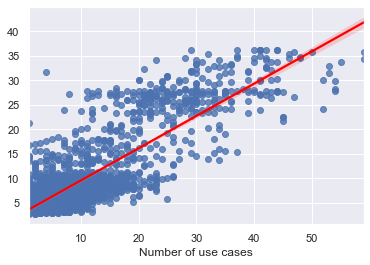

In [ ]:
sns.regplot(x = y_test, y = y_predict,line_kws={'color':"red"})

### The distribution of the 'number of use case' of the predictive model is  the left and the actual distribution is the right.

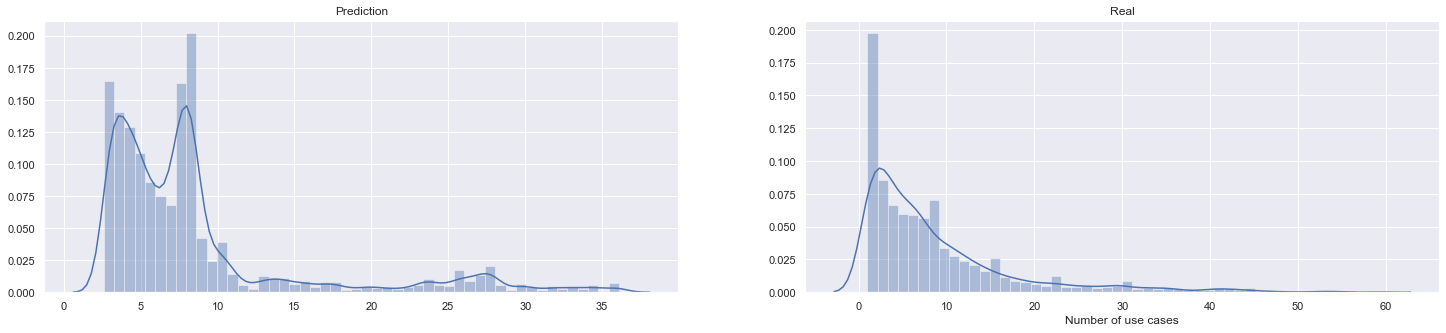

In [ ]:
predictions = y_predict

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(y_predict, ax=axes[0])
axes[0].set_title("Prediction")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("Real")
plt.show()

### Overlapping is as follows.

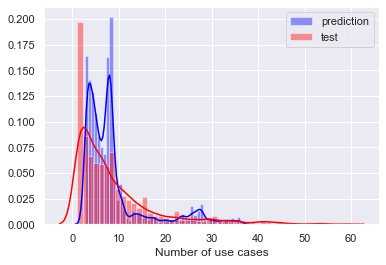

In [ ]:
sns.distplot(y_predict,color = 'blue',label='prediction' )
sns.distplot(y_test,color = 'red',label='test' )
plt.legend(loc='upper right')
plt.show()

### Consequently, this model can predict 'number of use cases' through 'Rental Place', 'weather' and 'day of week’